In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_4_stride_4_2_noDO_decode_B1H_Inst_min_max_rolling_std_window_65_seed_42_epochs_100"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           384       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            2576      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              6

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

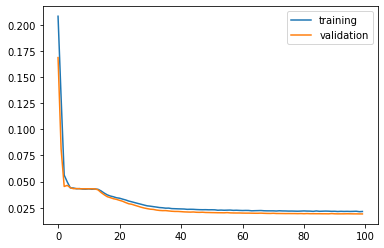

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [2 1 0]
group_bunches: [1699.  963.  249.]
group_bunches sorted: [ 249.  963. 1699.]
restore_index: [2 1 0]
group_bunches restored: [1699.  963.  249.]

50/50 [==============================] - 56s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
6588  Inst  7017     1     h  7 2018-08-03 22:21:00   
5821  Inst  6602     1     h  7 2018-04-23 18:34:15   
6751  Inst  6276     1     h  7 2017-10-06 17:47:14   
482   Inst  6690     1     h  7 2018-05-16 07:04:14   
1000  Inst  6356     1     h  7 2017-11-02 11:10:14   

                                                   file  n_bunches  \
6588  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7017/...       2556   
5821  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6602/...       1956   
6751  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...       1868   
482   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...       1227   
1000  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...       1868   

      bunch_index  bunch_number  ts_length  chunk  
6588       1237.0         914.0      65536     25  
5821       1129.0         908.0      65536     22  
6751       2368.0        1272.0      65536     26  
482         207.0          76.0      65536      1  
1000       3136.0        1688.0      65536      3

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 1)

In [13]:
train_prediction.shape

(396800, 2048, 1)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 902ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6390     1     h  7 2017-11-15 15:37:15   
1244  Inst  6890     1     h  7 2018-07-06 11:41:15   
5767  Inst  6346     1     h  7 2017-10-29 10:56:15   
7206  Inst  6961     1     h  7 2018-07-23 04:38:06   
7624  Inst  6390     1     h  7 2017-11-15 15:37:15   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/...        748   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6890/...       1452   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...        652   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6961/...       2556   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/...        748   

      bunch_index  bunch_number  ts_length  chunk  
4808        481.0         234.0      65536     18  
1244        912.0         376.0      65536      4  
5767        252.0         130.0      65536     22  
7206       1616.0        1203.0      65536     28  
7624        481.0         234.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 1)

In [18]:
validation_prediction.shape

(39680, 2048, 1)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

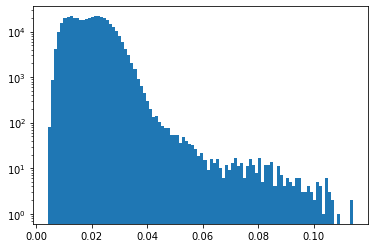

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

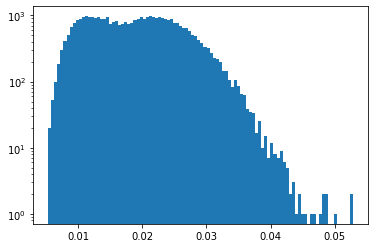

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.0225775789345634
type                                                         Inst
fill                                                         7017
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-03 22:21:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7017/...
n_bunches                                                    2556
bunch_index                                                  1237
bunch_number                                                  914
ts_length                                                   65536
chunk                                                          25
Name: 6588, dtype: object


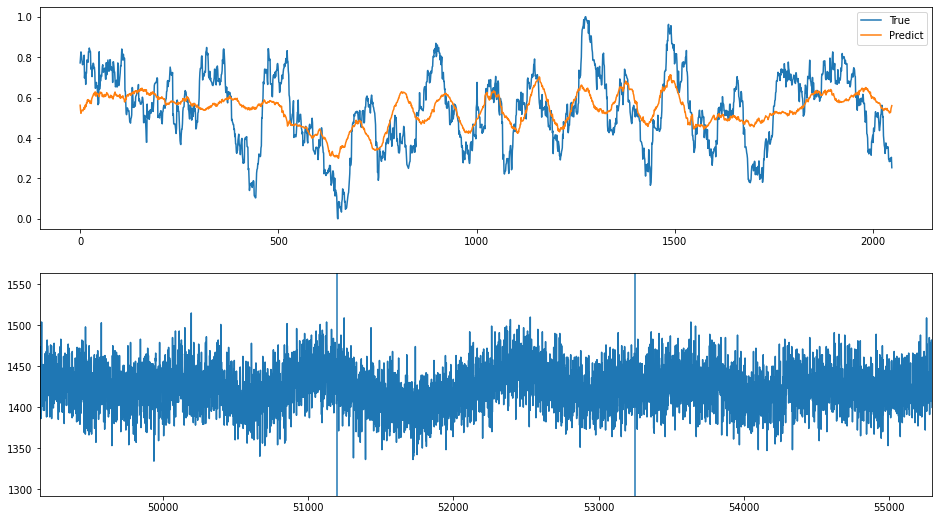

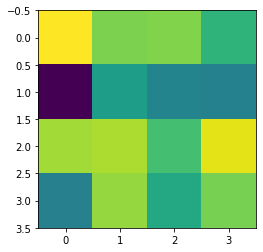

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 133566
Error: 0.0042892103574281686
type                                                         Inst
fill                                                         6442
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-01 00:09:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6442/...
n_bunches                                                     652
bunch_index                                                   519
bunch_number                                                  282
ts_length                                                   65536
chunk                                                          25
Name: 6487, dtype: object


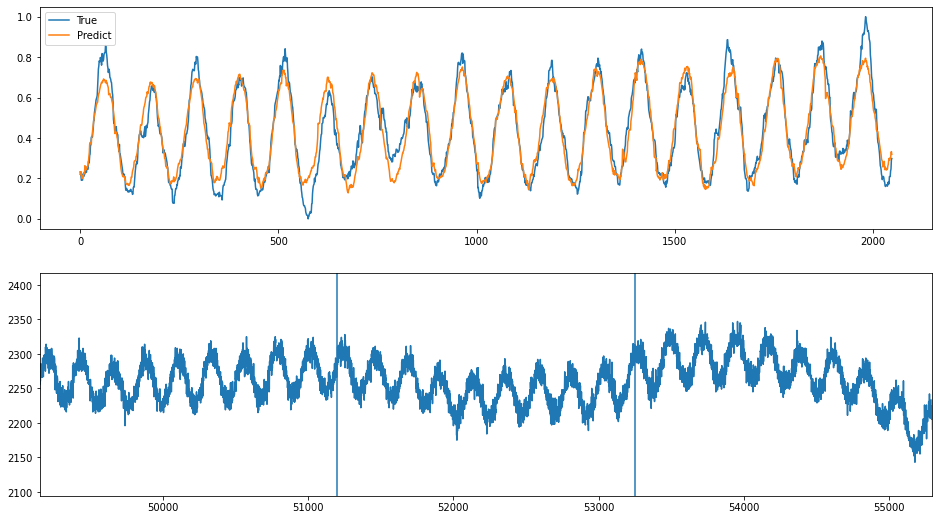

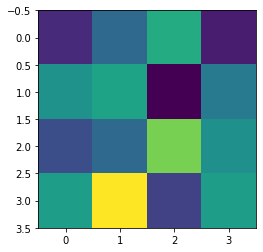

index: 246883
Error: 0.004454419389672129
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:47:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1550
bunch_number                                                   86
ts_length                                                   65536
chunk                                                          16
Name: 4274, dtype: object


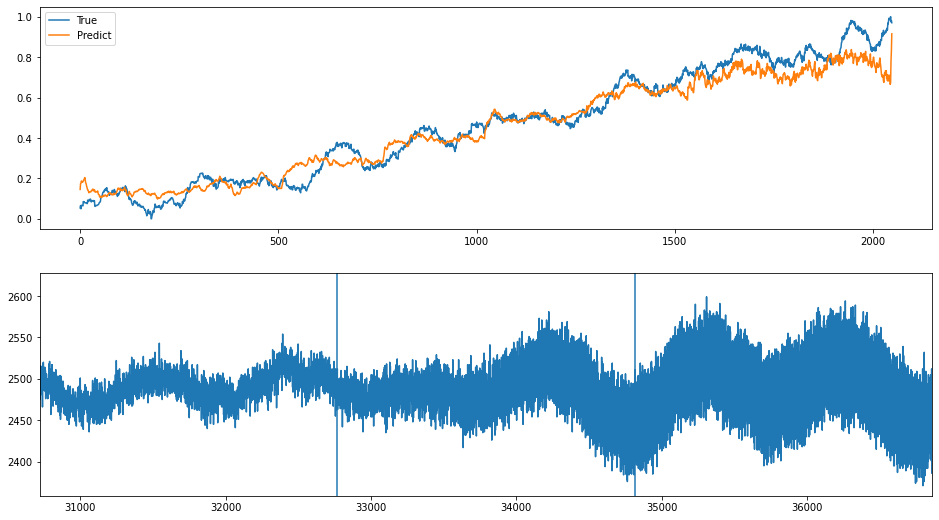

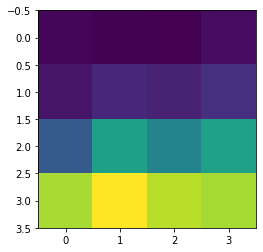

index: 391546
Error: 0.004461854048793653
type                                                         Inst
fill                                                         6340
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-27 21:24:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6340/...
n_bunches                                                     172
bunch_index                                                    83
bunch_number                                                   38
ts_length                                                   65536
chunk                                                          13
Name: 3419, dtype: object


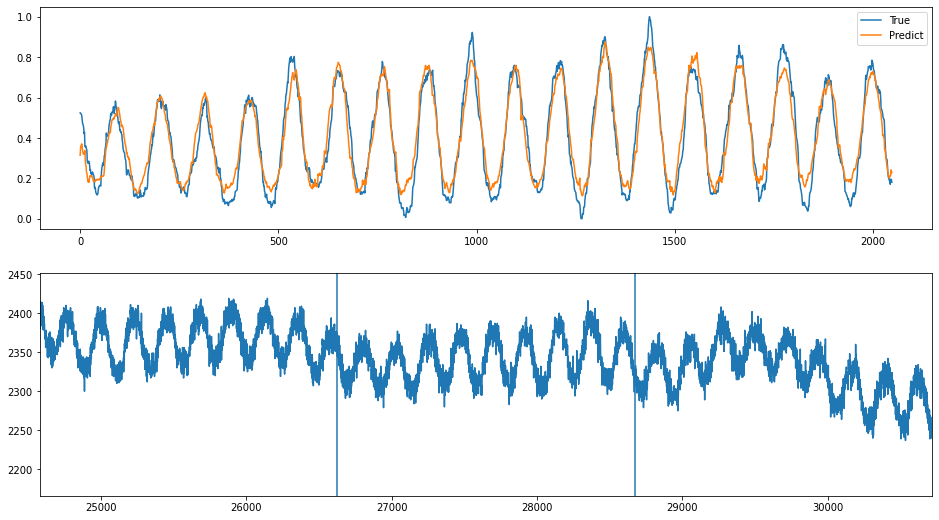

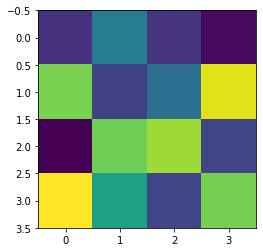

index: 280607
Error: 0.004489271630263966
type                                                         Inst
fill                                                         6268
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-03 12:23:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6268/...
n_bunches                                                     204
bunch_index                                                   278
bunch_number                                                  135
ts_length                                                   65536
chunk                                                          17
Name: 4456, dtype: object


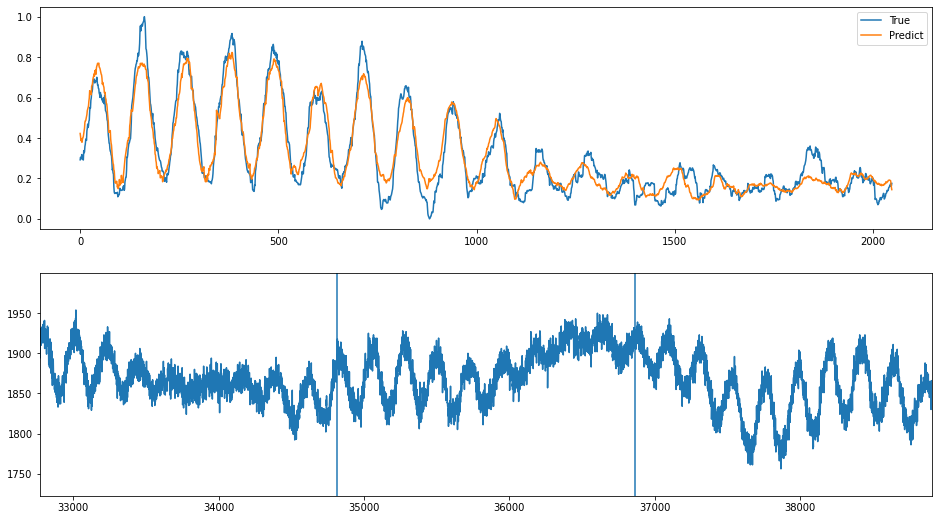

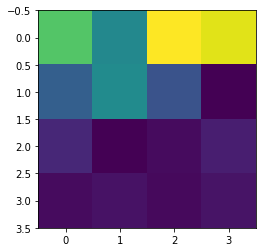

index: 219192
Error: 0.004498903355338508
type                                                         Inst
fill                                                         6597
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 10:17:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6597/...
n_bunches                                                     516
bunch_index                                                   601
bunch_number                                                  486
ts_length                                                   65536
chunk                                                           7
Name: 1945, dtype: object


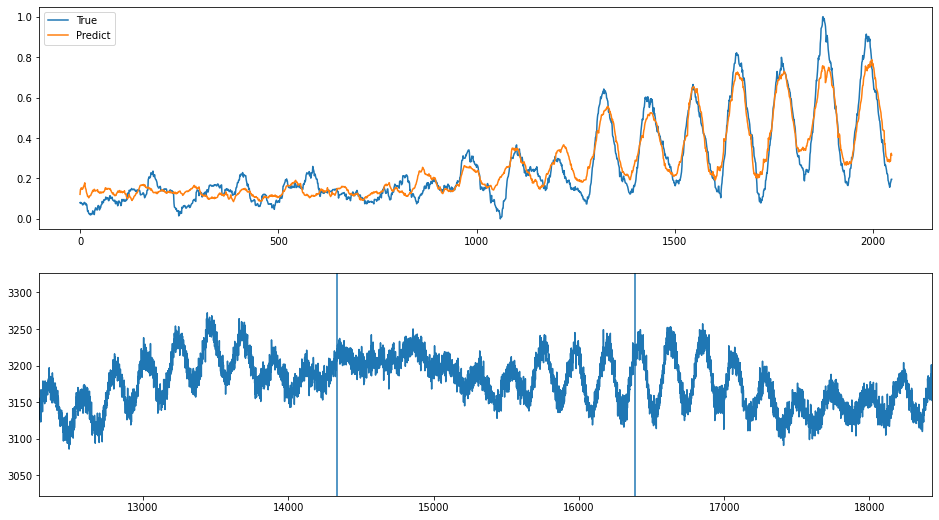

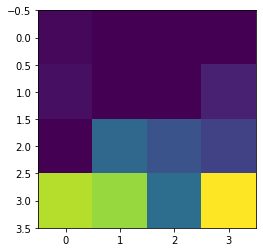

index: 112297
Error: 0.0047320682371226434
type                                                         Inst
fill                                                         6940
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-18 04:54:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6940/...
n_bunches                                                     396
bunch_index                                                   309
bunch_number                                                  208
ts_length                                                   65536
chunk                                                          19
Name: 4885, dtype: object


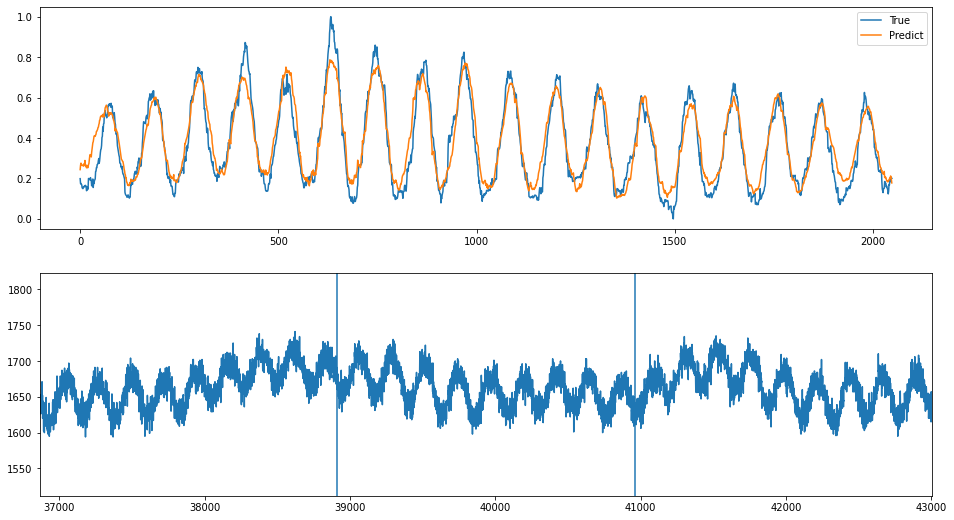

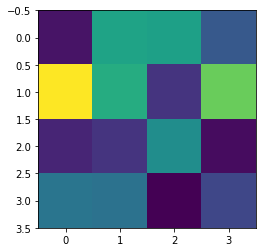

index: 8874
Error: 0.004740258677887856
type                                                         Inst
fill                                                         7223
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-27 17:56:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7223/...
n_bunches                                                     252
bunch_index                                                   252
bunch_number                                                  158
ts_length                                                   65536
chunk                                                           1
Name: 511, dtype: object


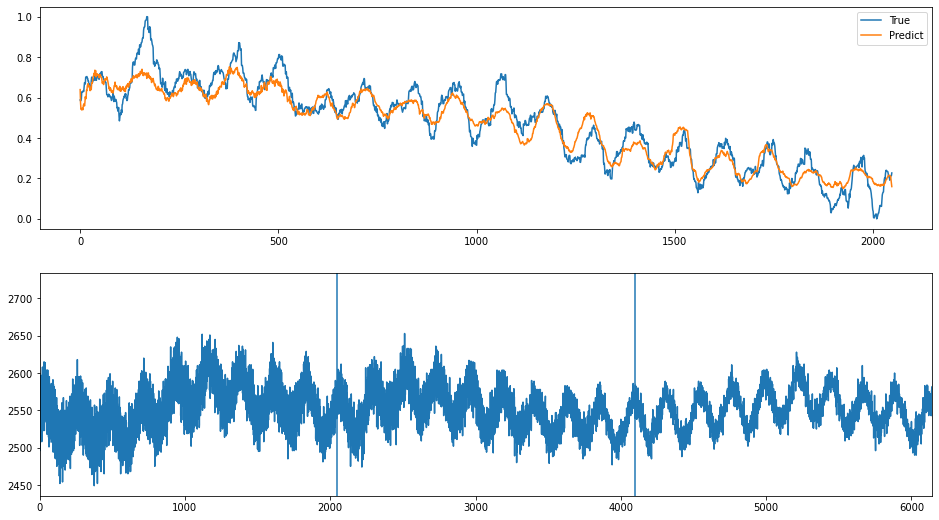

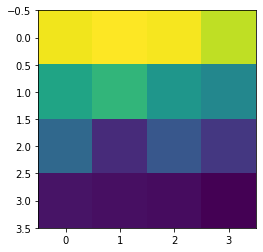

index: 164480
Error: 0.004756755557865937
type                                                         Inst
fill                                                         6447
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 05:39:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6447/...
n_bunches                                                     312
bunch_index                                                    76
bunch_number                                                   24
ts_length                                                   65536
chunk                                                          21
Name: 5484, dtype: object


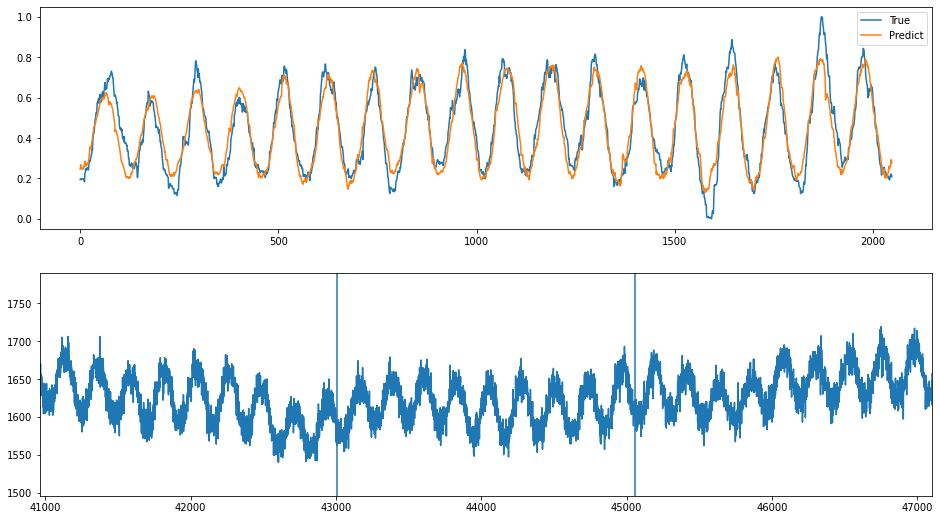

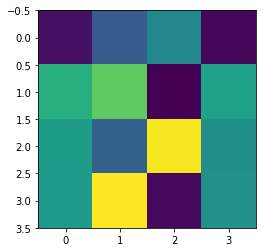

index: 50036
Error: 0.004764168171210875
type                                                         Inst
fill                                                         6256
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-30 02:12:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6256/...
n_bunches                                                     404
bunch_index                                                   704
bunch_number                                                  388
ts_length                                                   65536
chunk                                                           7
Name: 1971, dtype: object


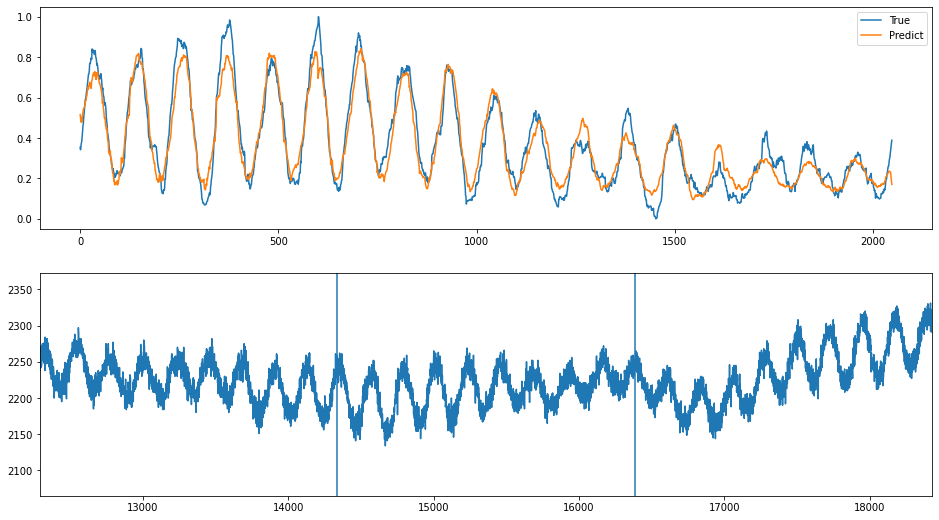

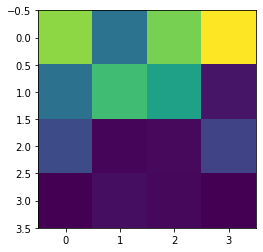

index: 177407
Error: 0.004773037940175492
type                                                         Inst
fill                                                         6215
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-16 23:22:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...
n_bunches                                                     396
bunch_index                                                   444
bunch_number                                                  311
ts_length                                                   65536
chunk                                                          25
Name: 6476, dtype: object


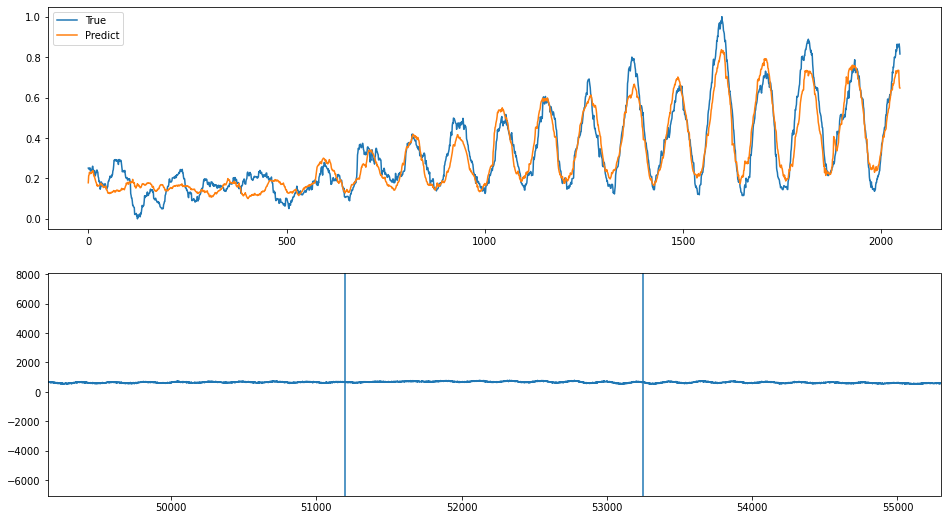

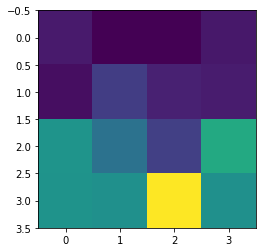

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 348822
Error: 0.11403151828878609
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                           5
Name: 1510, dtype: object


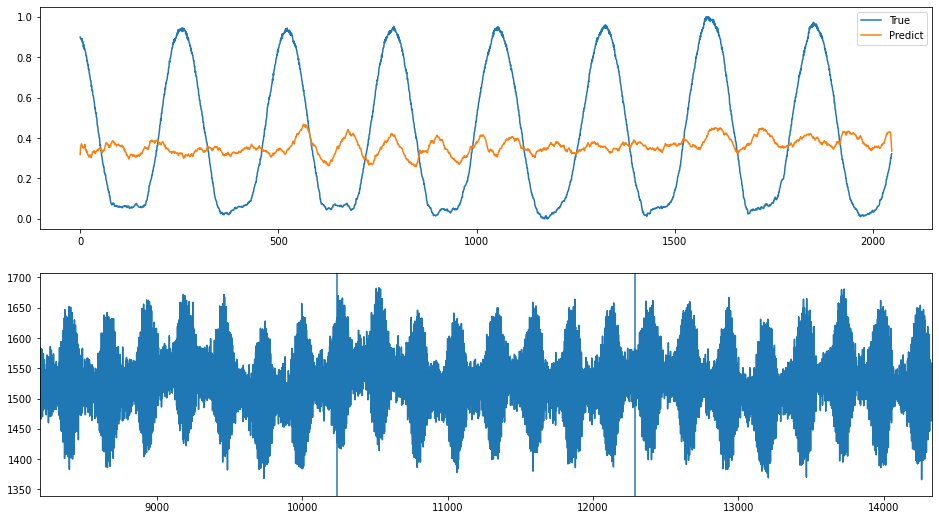

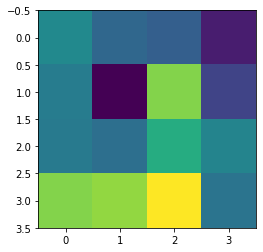

index: 344848
Error: 0.11360637855893065
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                           4
Name: 1254, dtype: object


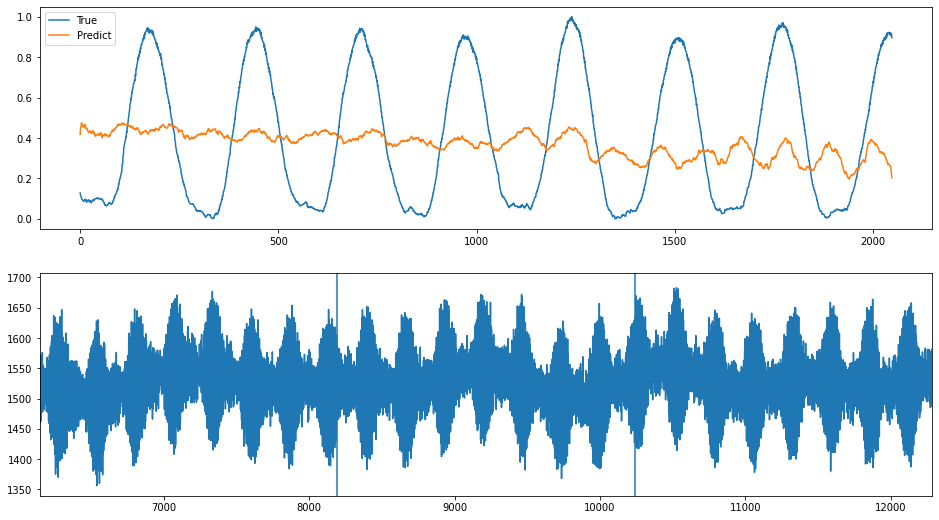

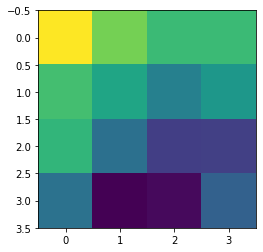

index: 358727
Error: 0.1085946718594184
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          16
Name: 4152, dtype: object


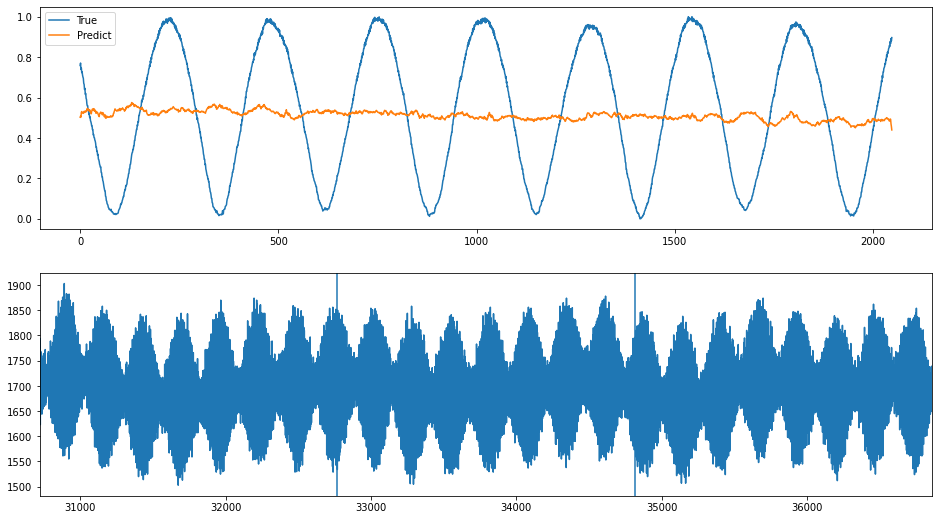

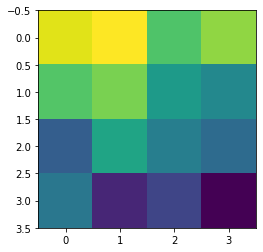

index: 344032
Error: 0.10698759197373343
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                           3
Name: 998, dtype: object


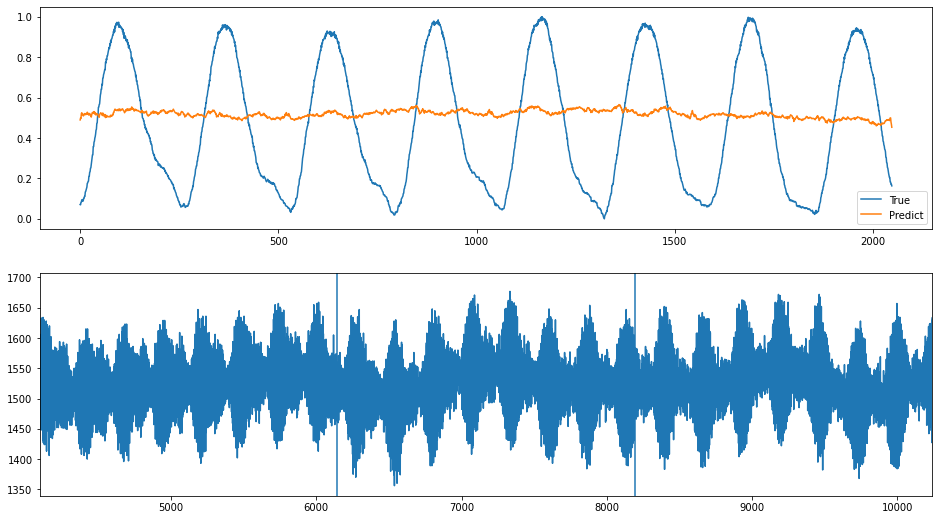

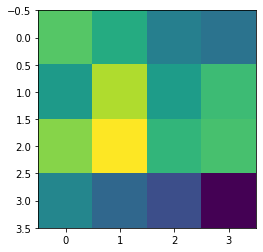

index: 344020
Error: 0.10636499171734623
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          30
Name: 7910, dtype: object


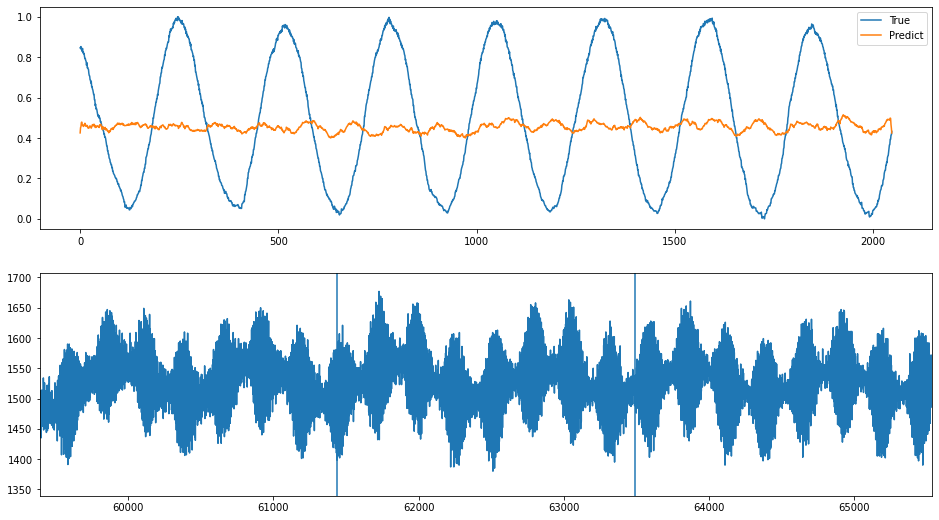

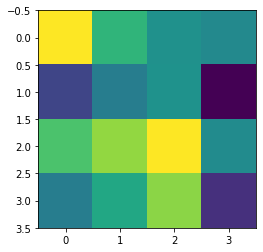

index: 342272
Error: 0.10615394138180187
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          22
Name: 5862, dtype: object


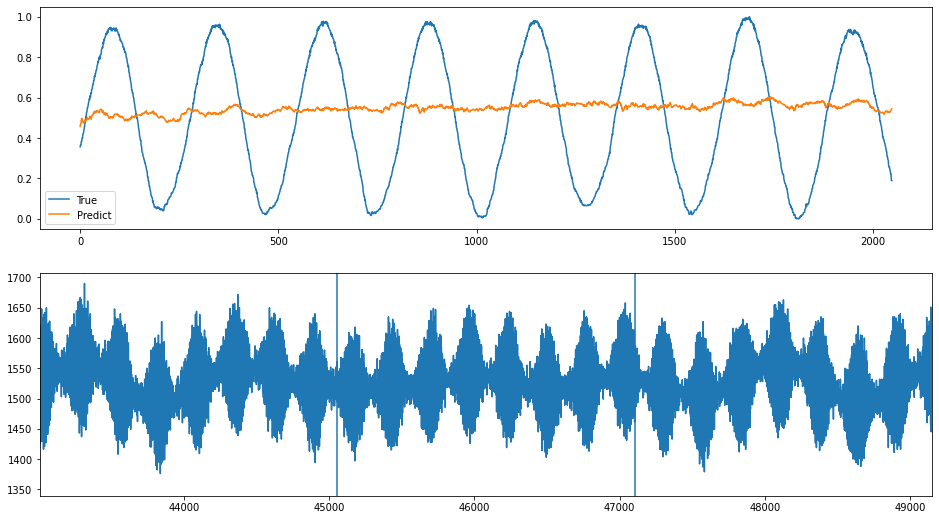

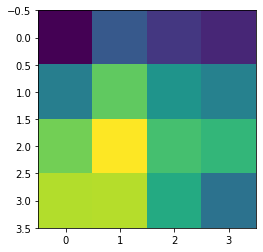

index: 345524
Error: 0.1061436135343824
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          24
Name: 6374, dtype: object


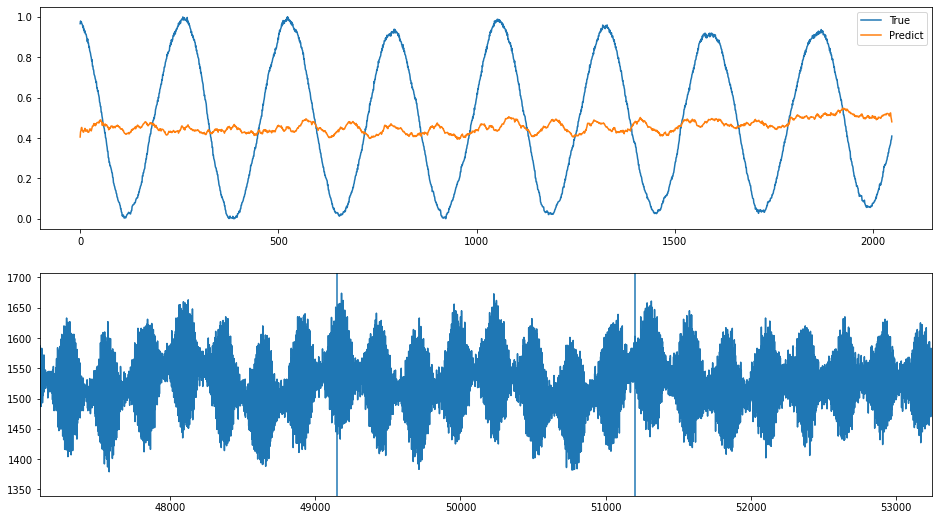

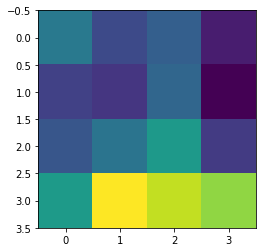

index: 346375
Error: 0.10593160768251221
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          12
Name: 3302, dtype: object


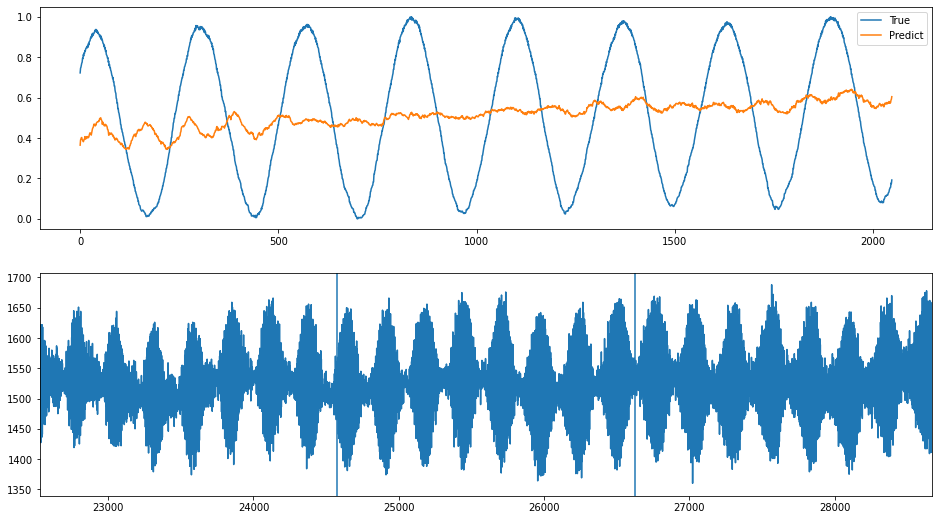

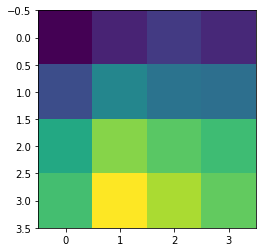

index: 343694
Error: 0.10483217956464155
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          21
Name: 5606, dtype: object


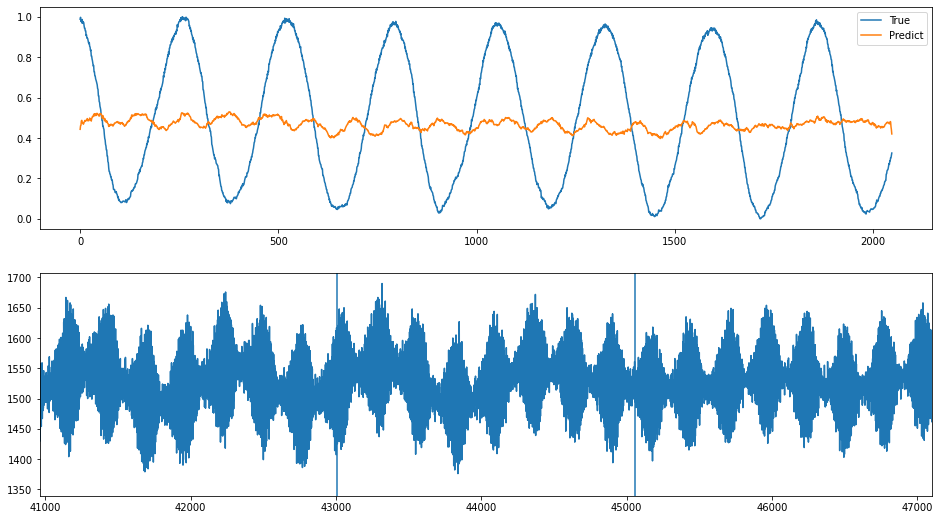

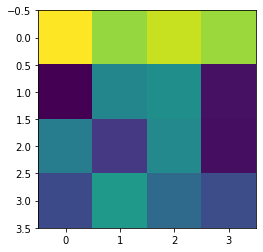

index: 342079
Error: 0.10442826662166885
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                           6
Name: 1766, dtype: object


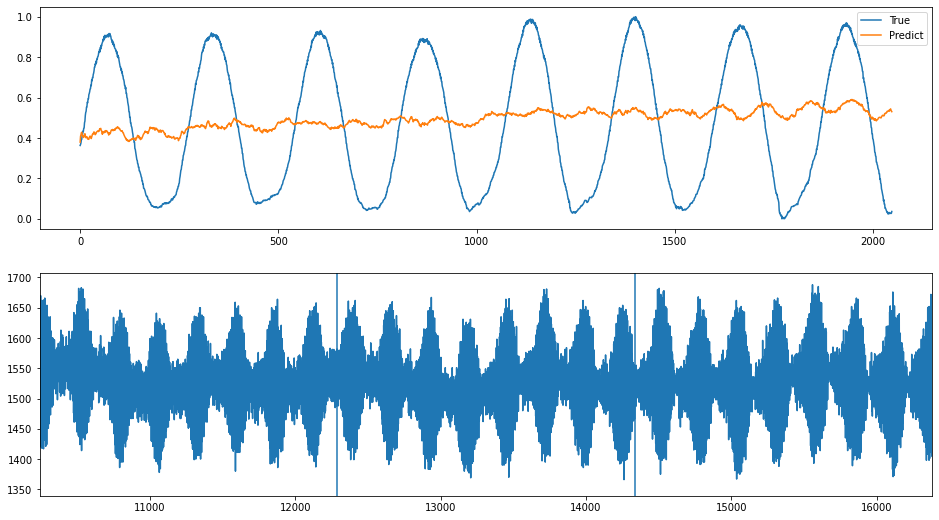

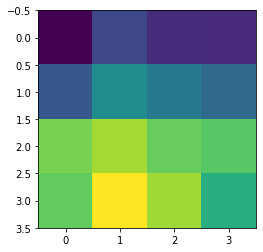

index: 357344
Error: 0.1043660411220281
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          15
Name: 3896, dtype: object


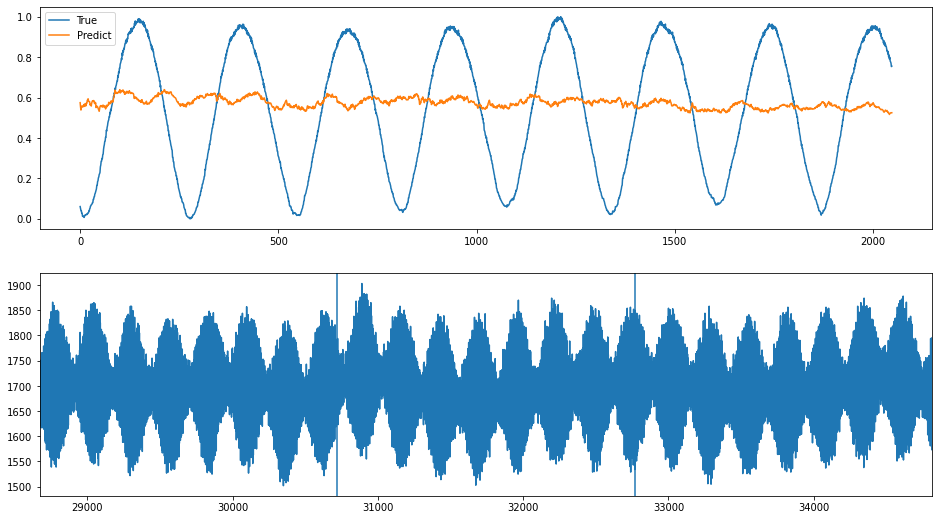

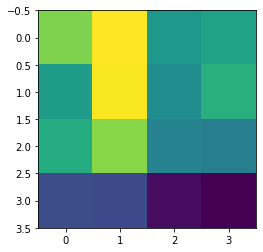

index: 344075
Error: 0.1042601193413236
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                           7
Name: 2022, dtype: object


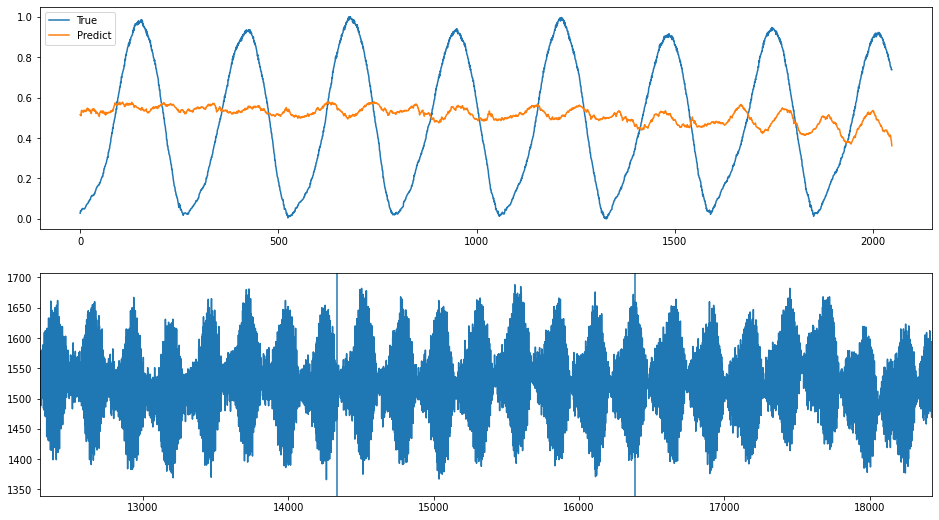

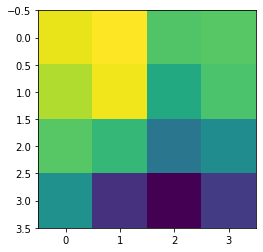

index: 348996
Error: 0.1042530373836371
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          23
Name: 6118, dtype: object


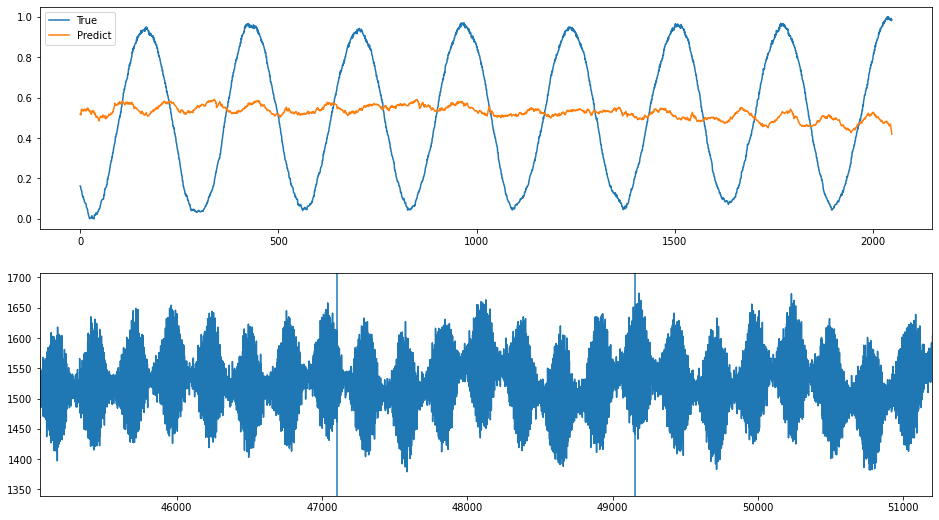

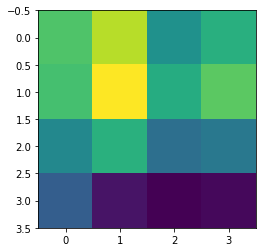

index: 342565
Error: 0.1041684536867579
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          20
Name: 5350, dtype: object


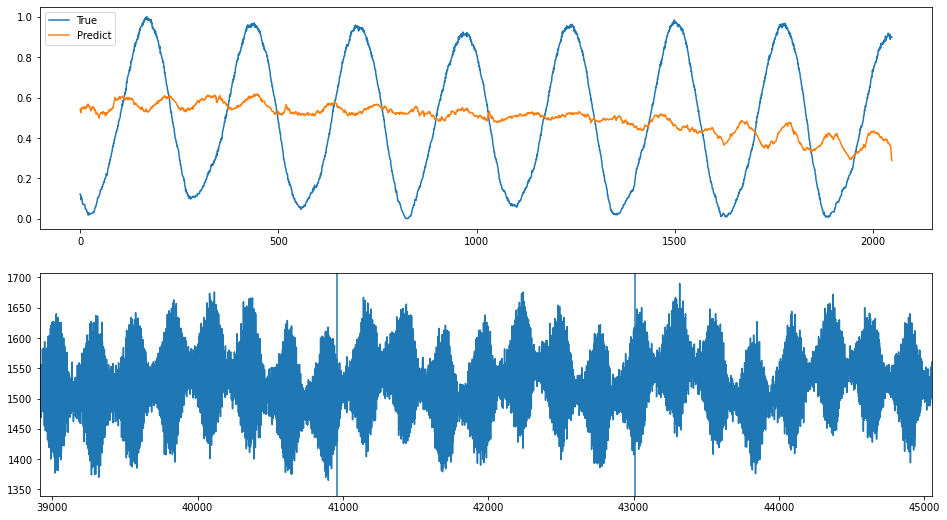

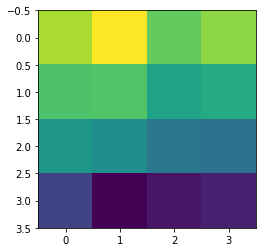

index: 345301
Error: 0.10358566687609183
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          18
Name: 4838, dtype: object


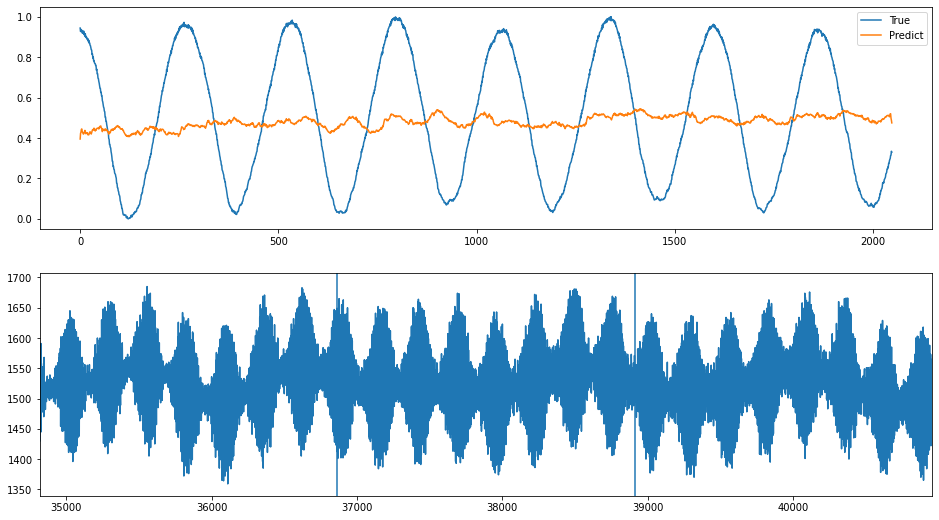

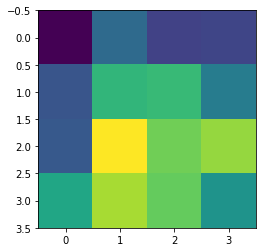

index: 362367
Error: 0.10301792480722785
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          14
Name: 3640, dtype: object


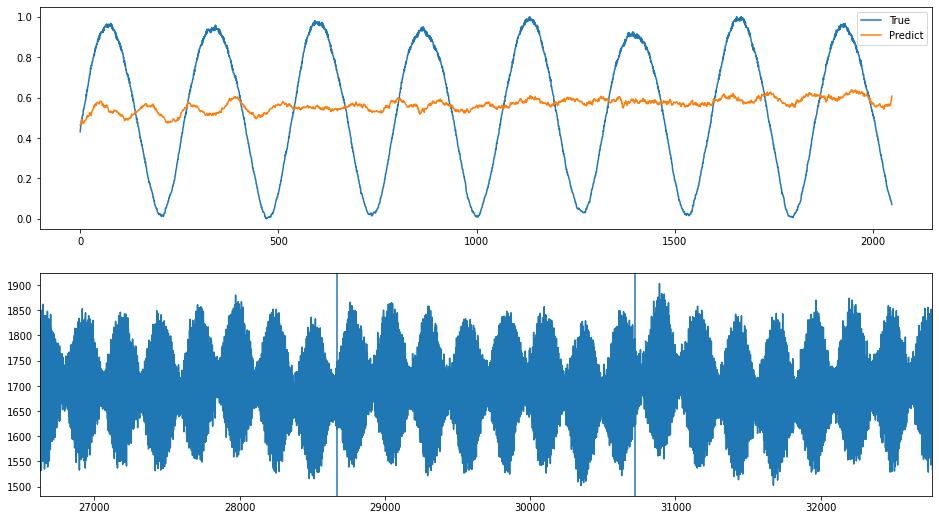

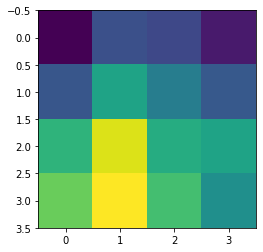

index: 346502
Error: 0.10254120436941894
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          19
Name: 5094, dtype: object


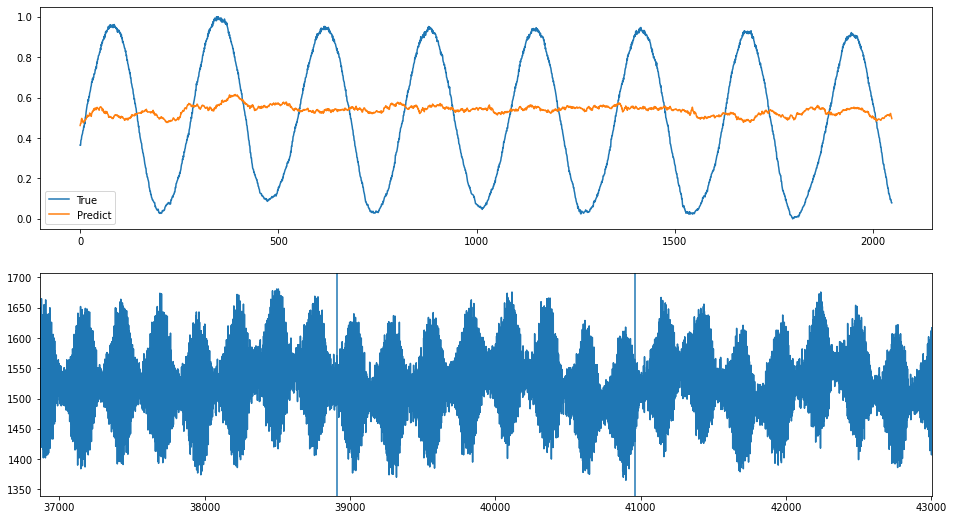

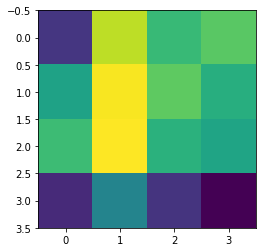

index: 346908
Error: 0.10235951050500554
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          29
Name: 7654, dtype: object


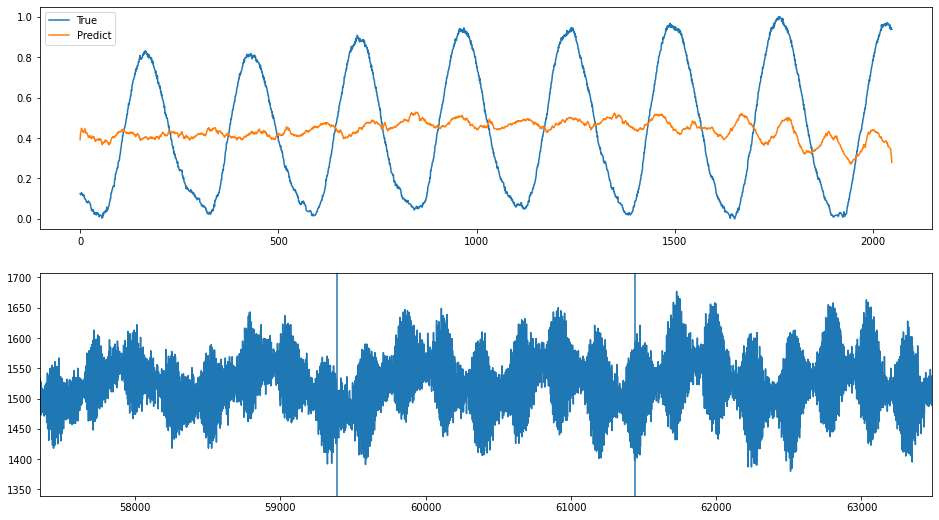

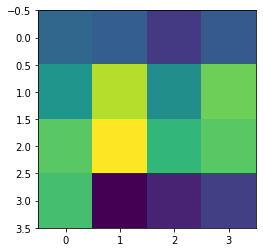

index: 359591
Error: 0.1023126273125193
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          21
Name: 5432, dtype: object


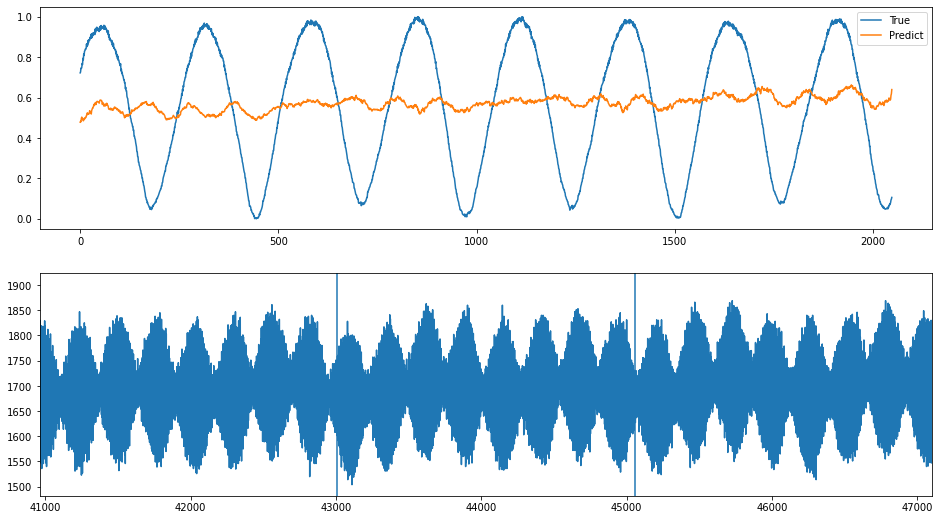

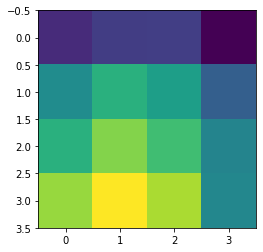

index: 358876
Error: 0.10193142907479882
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          28
Name: 7224, dtype: object


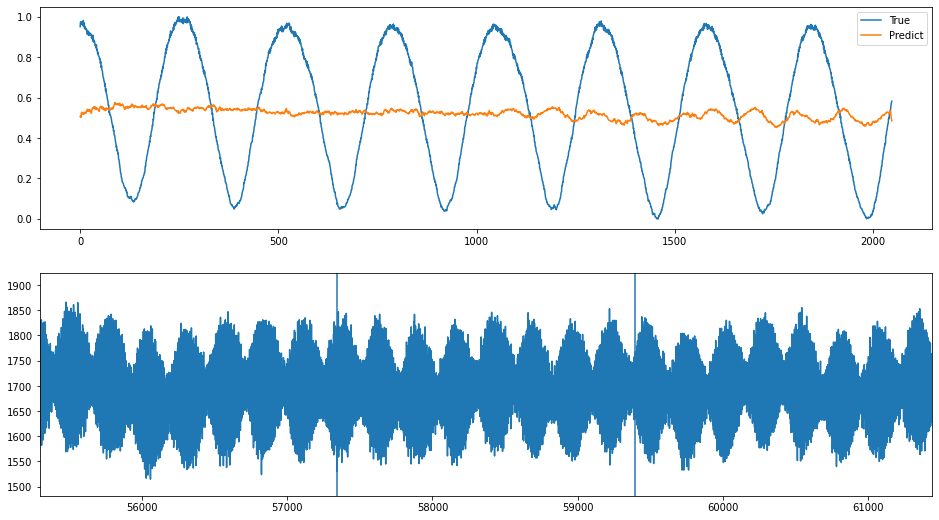

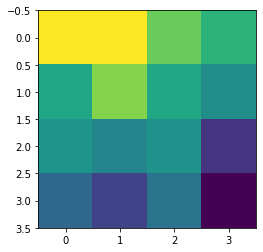

index: 358380
Error: 0.10176501597254667
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           7
Name: 1848, dtype: object


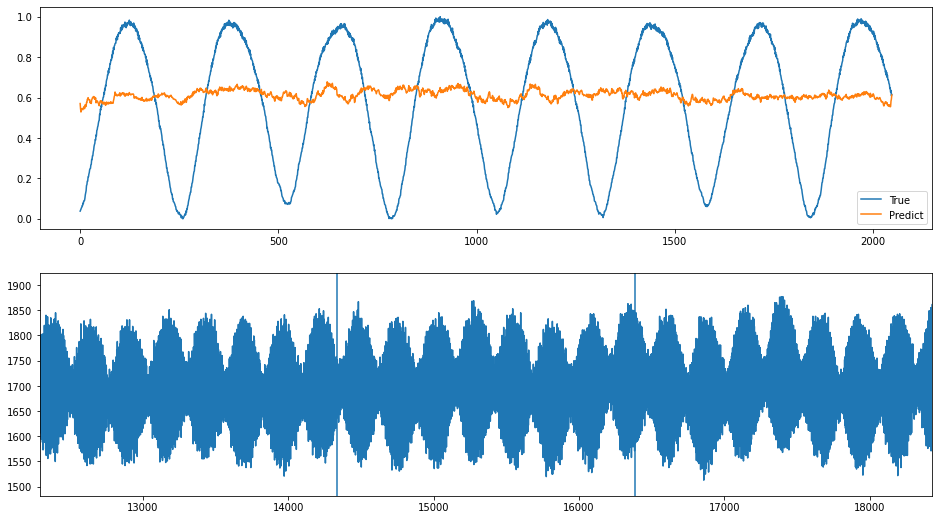

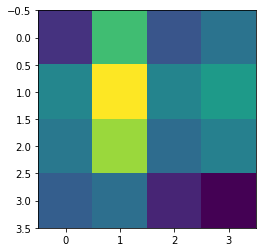

index: 357604
Error: 0.10163975060680647
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1504
bunch_number                                                   63
ts_length                                                   65536
chunk                                                          19
Name: 4864, dtype: object


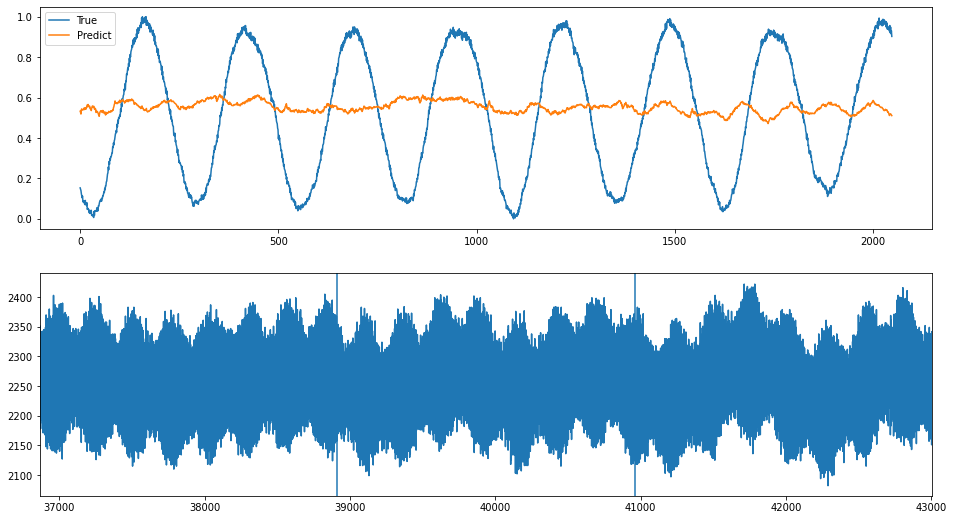

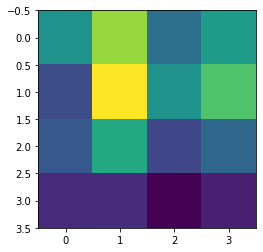

index: 361673
Error: 0.10125352245087552
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          11
Name: 2872, dtype: object


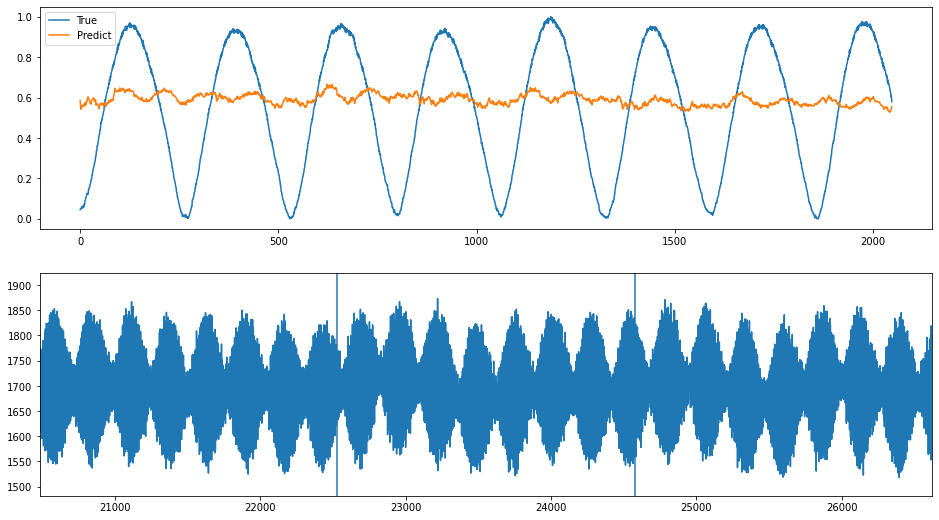

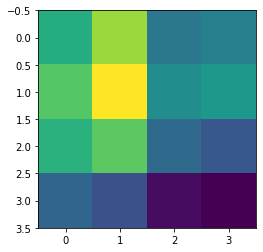

index: 357775
Error: 0.10098475149470224
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          17
Name: 4408, dtype: object


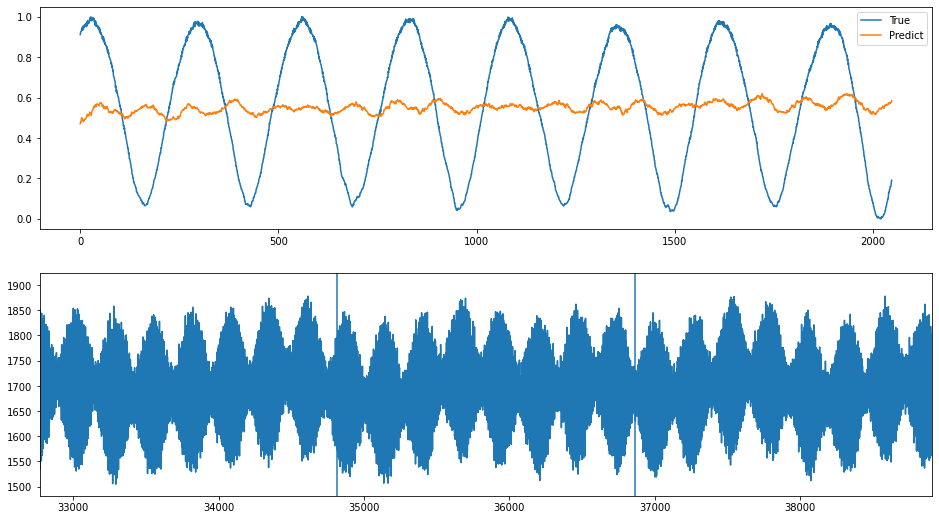

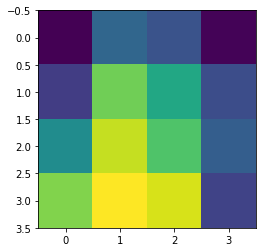

index: 363380
Error: 0.10073707342546773
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1504
bunch_number                                                   63
ts_length                                                   65536
chunk                                                           1
Name: 256, dtype: object


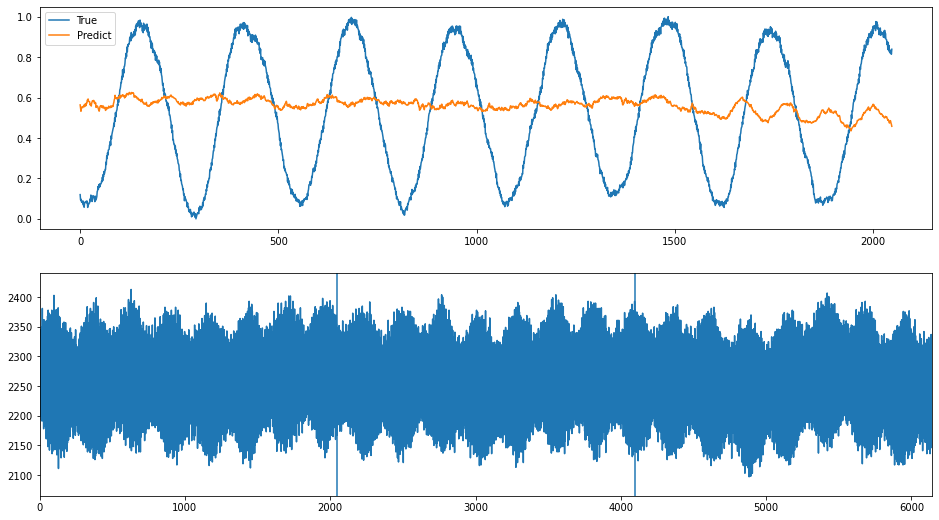

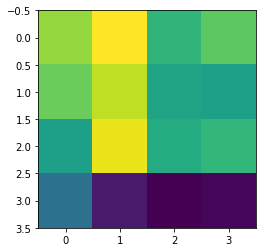

index: 363184
Error: 0.10056344461398298
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          19
Name: 4920, dtype: object


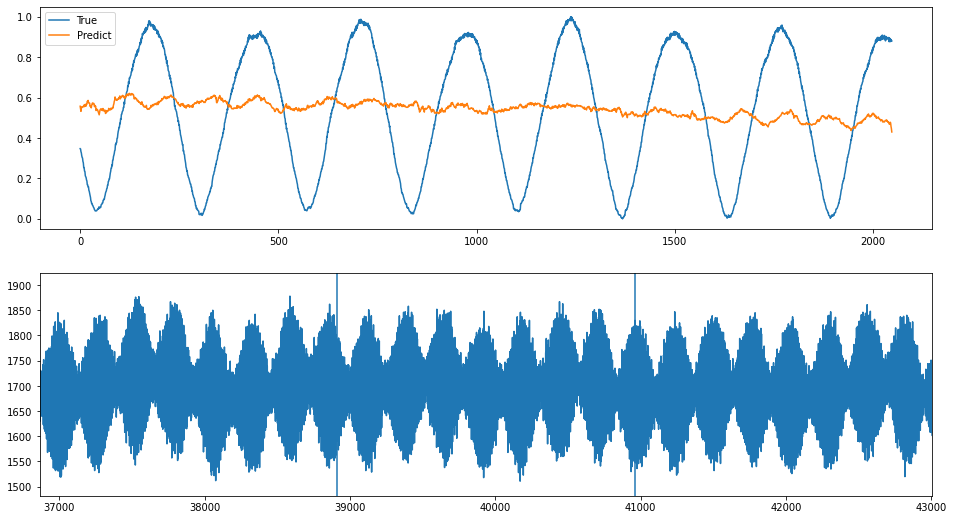

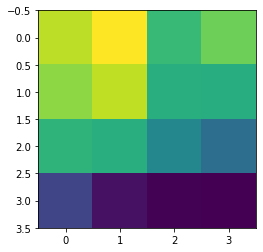

index: 363503
Error: 0.09944005819037563
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           2
Name: 568, dtype: object


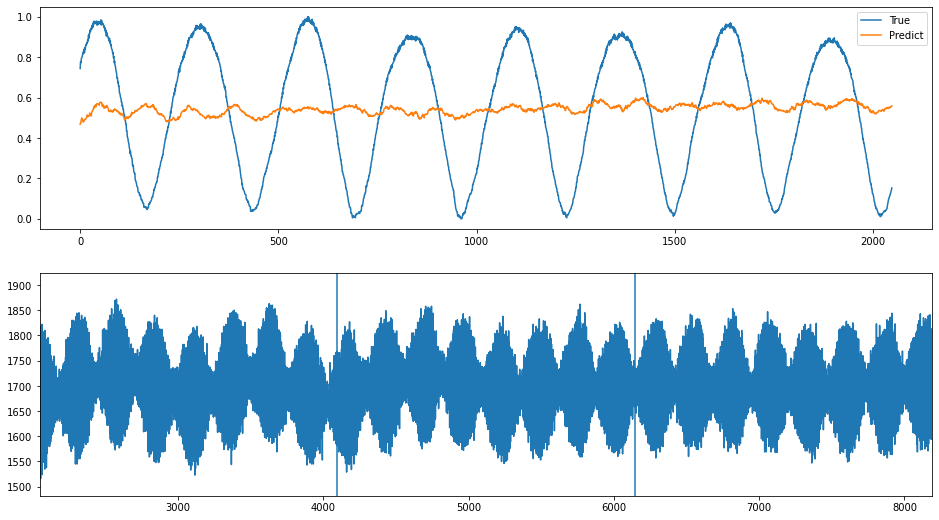

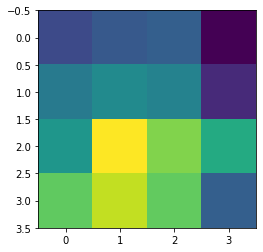

index: 357849
Error: 0.09896773697739909
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          20
Name: 5176, dtype: object


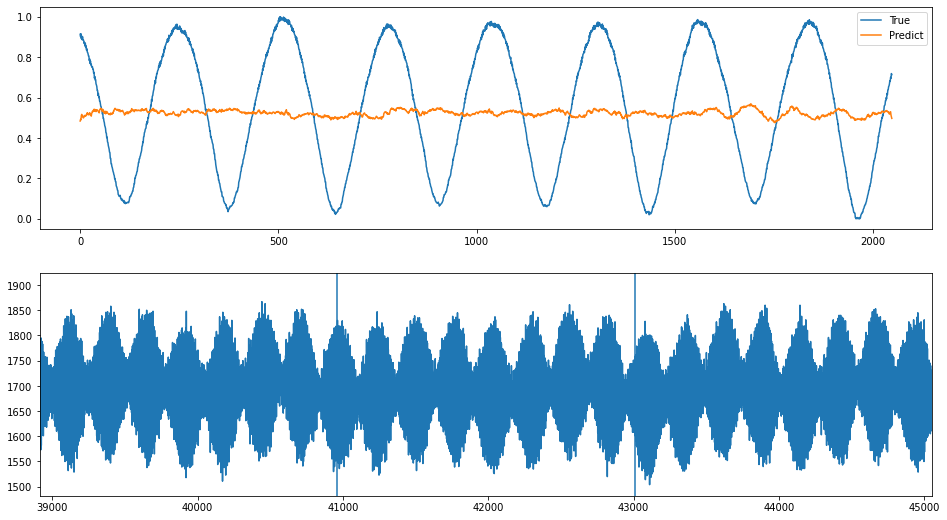

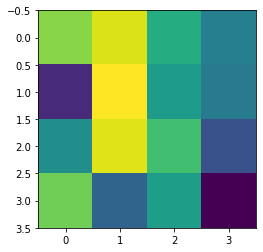

index: 363239
Error: 0.09872374114905937
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1504
bunch_number                                                   63
ts_length                                                   65536
chunk                                                          23
Name: 5888, dtype: object


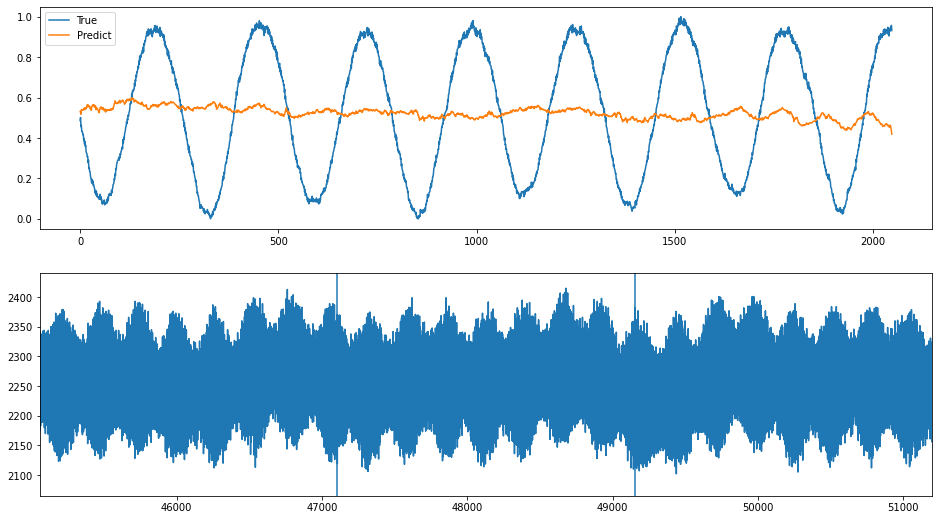

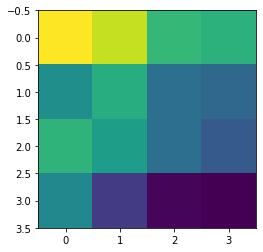

index: 361282
Error: 0.09849681790906584
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           1
Name: 312, dtype: object


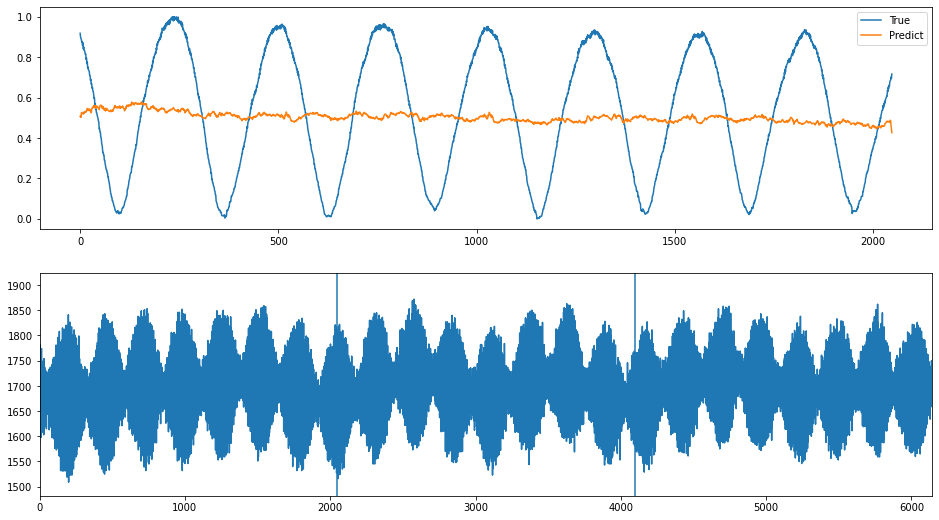

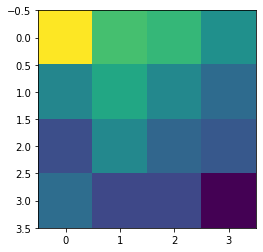

index: 361031
Error: 0.09841709612698565
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1504
bunch_number                                                   63
ts_length                                                   65536
chunk                                                           9
Name: 2304, dtype: object


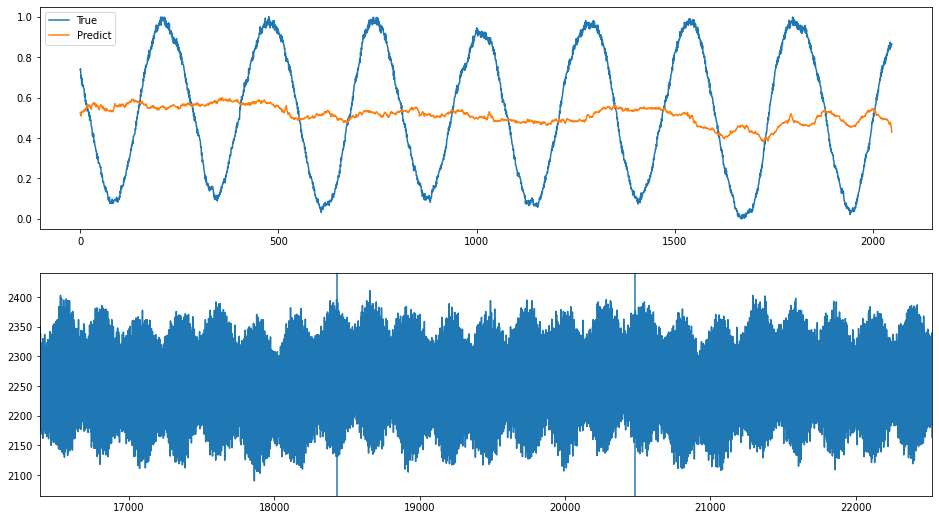

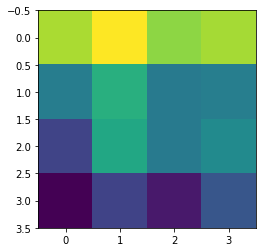

index: 362350
Error: 0.09811836749365692
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          29
Name: 7480, dtype: object


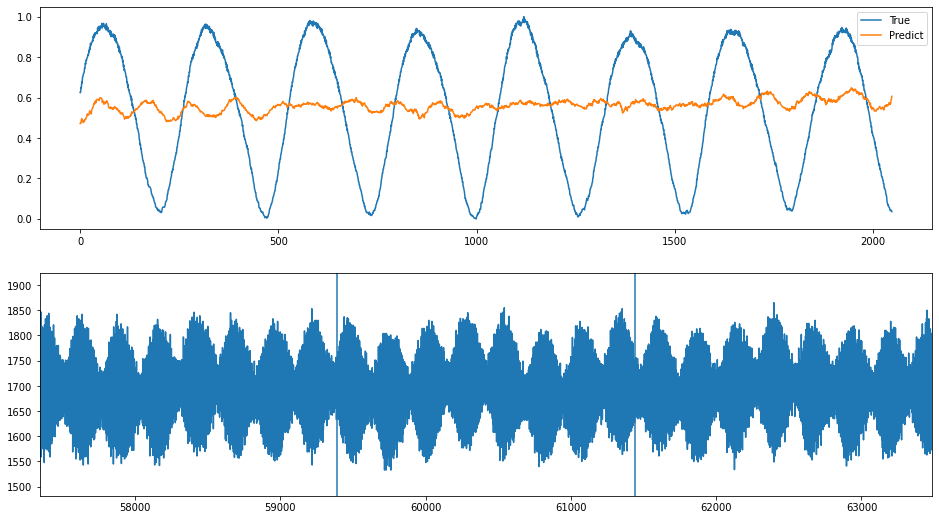

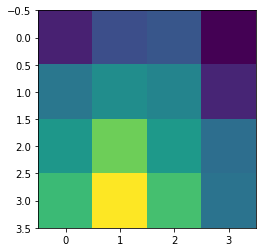

index: 360866
Error: 0.09810898038643652
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          24
Name: 6200, dtype: object


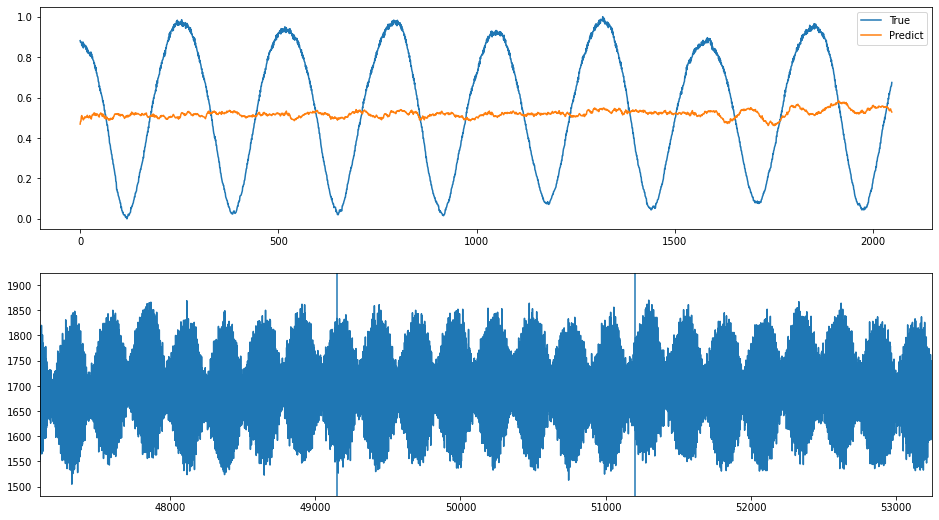

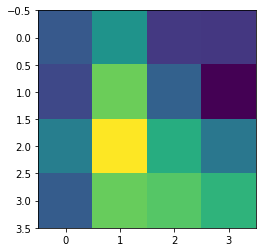

index: 327713
Error: 0.097272355713902
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:55:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   532
bunch_number                                                   35
ts_length                                                   65536
chunk                                                          26
Name: 6659, dtype: object


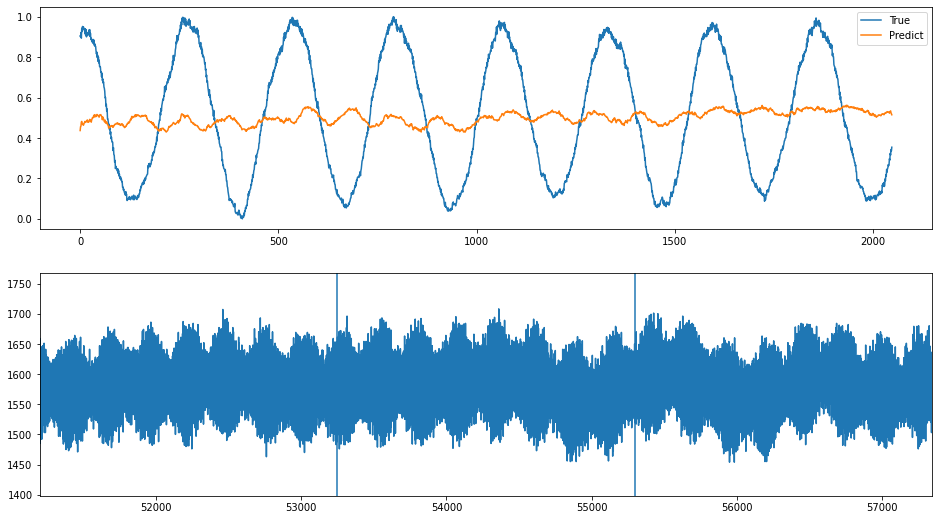

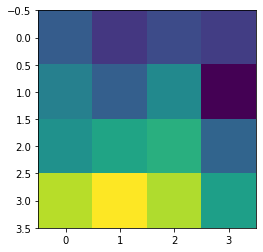

index: 344749
Error: 0.09698807365583609
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          17
Name: 4582, dtype: object


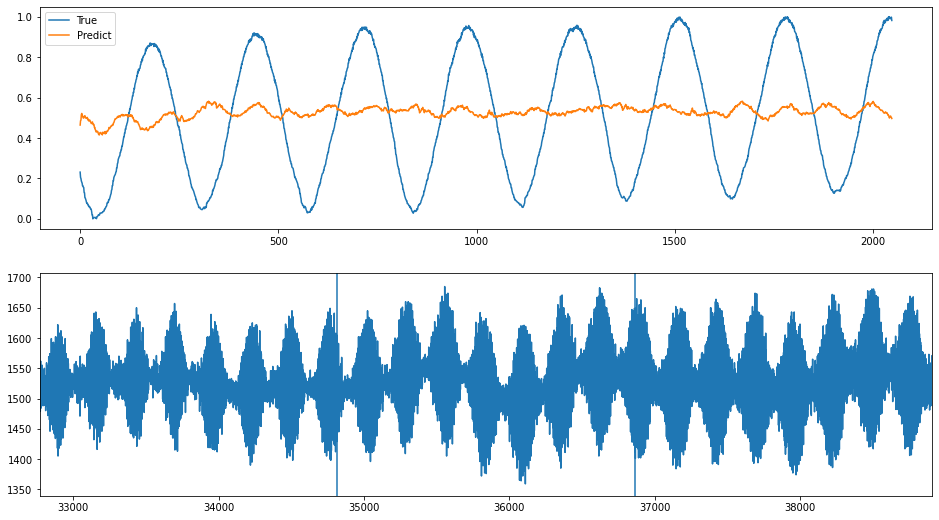

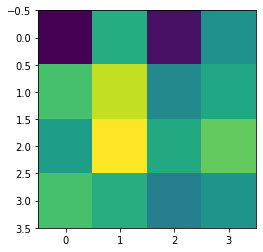

index: 359240
Error: 0.0964878302860924
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           9
Name: 2360, dtype: object


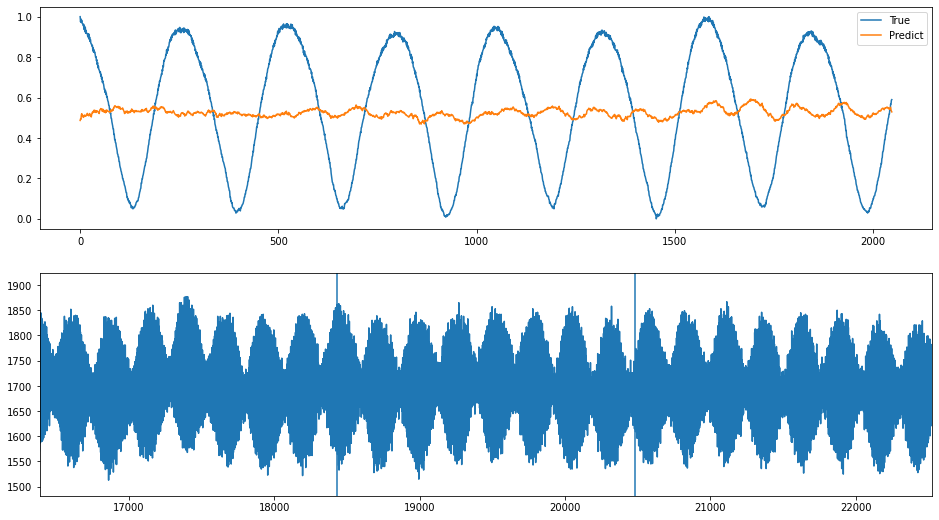

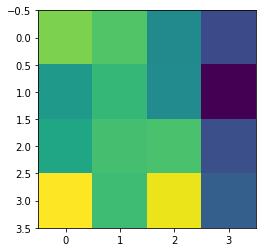

index: 358478
Error: 0.09642058686938426
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          13
Name: 3384, dtype: object


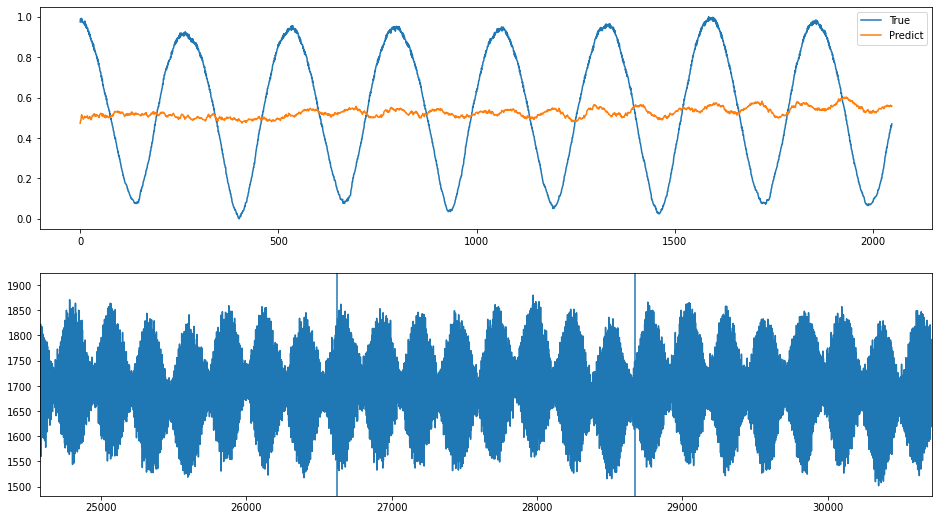

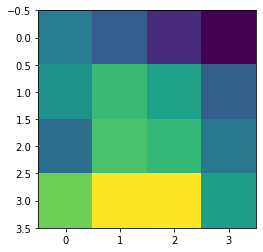

index: 362982
Error: 0.09596139519665023
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          30
Name: 7736, dtype: object


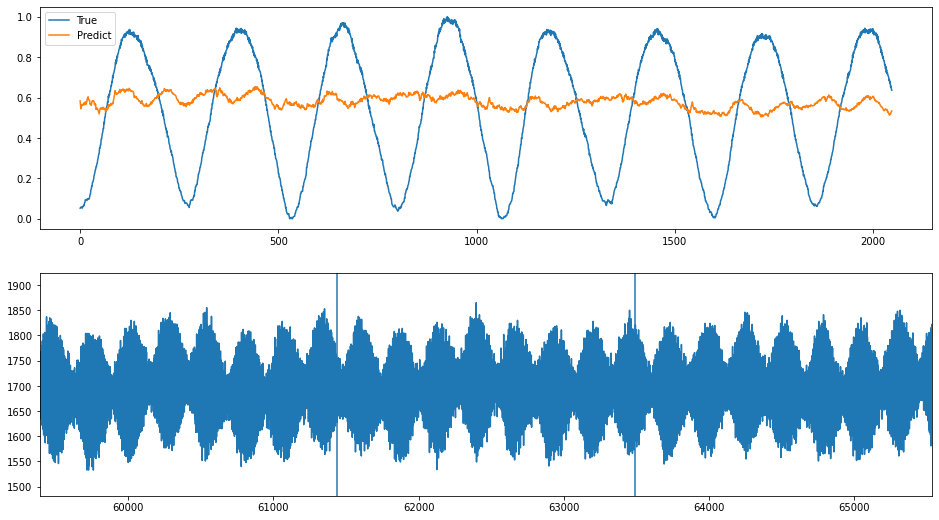

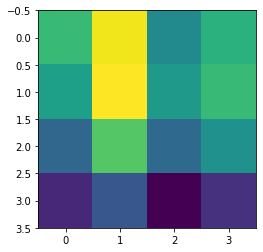

index: 364978
Error: 0.09572602618201714
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           6
Name: 1592, dtype: object


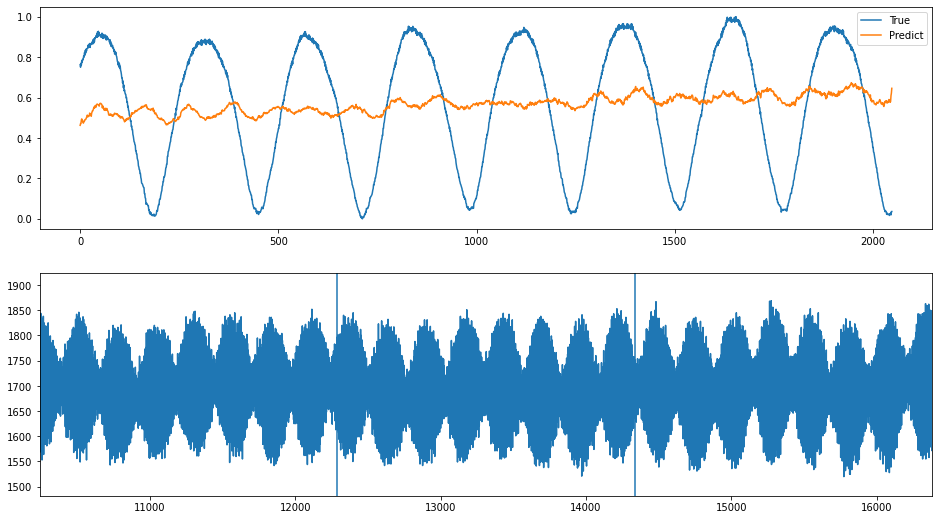

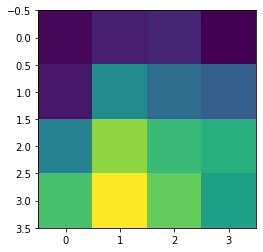

index: 359871
Error: 0.09526688658582648
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           0
Name: 56, dtype: object


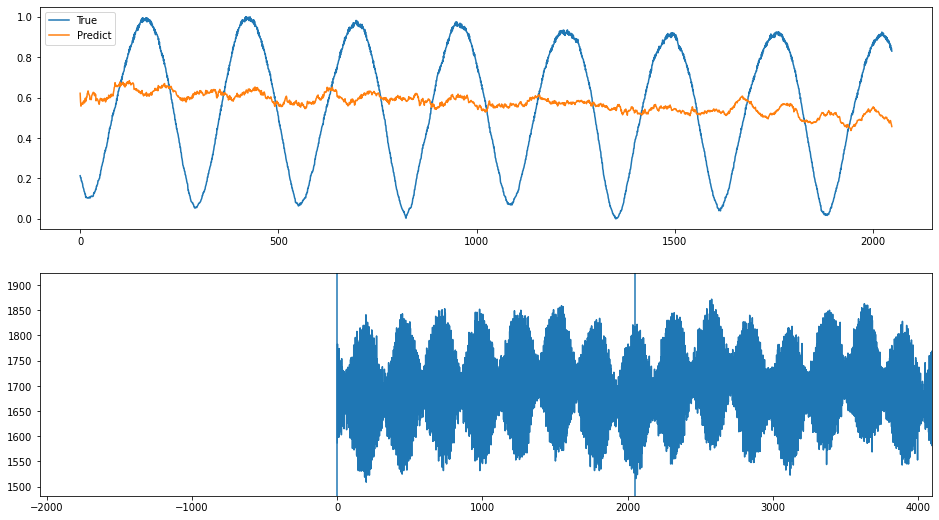

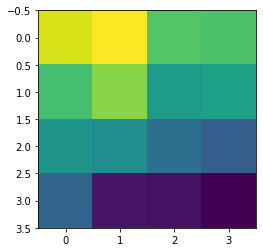

index: 343290
Error: 0.0952075305978329
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   548
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          13
Name: 3558, dtype: object


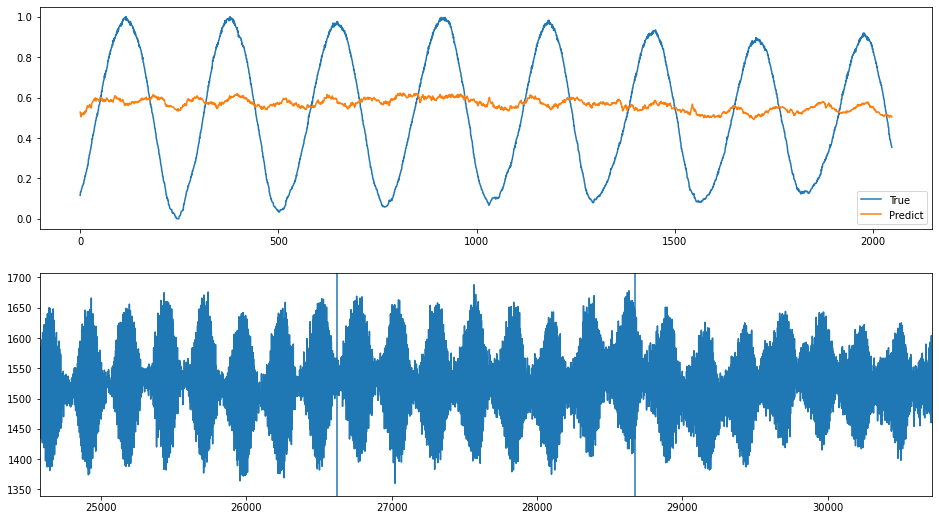

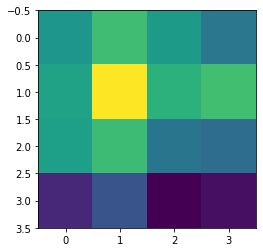

index: 362642
Error: 0.09482194715288239
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           5
Name: 1336, dtype: object


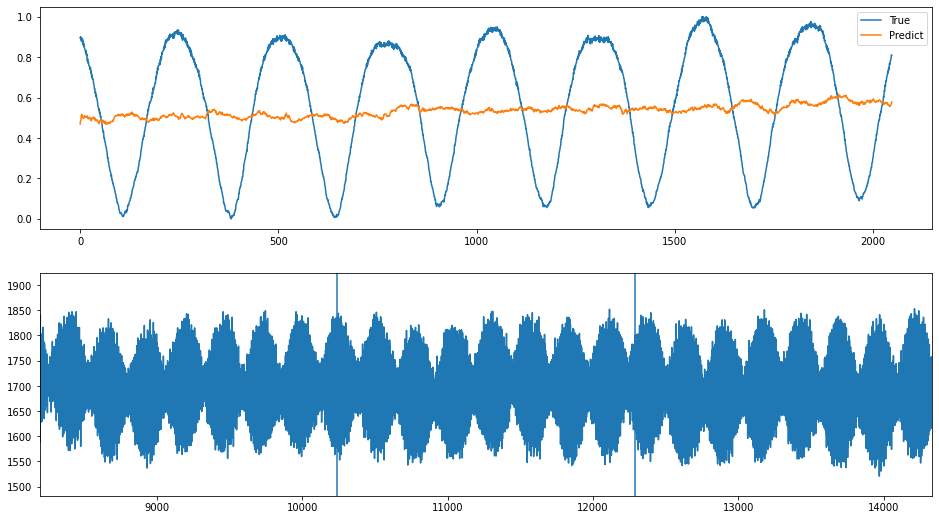

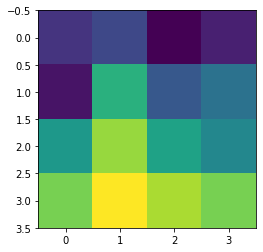

index: 362379
Error: 0.09480713018996852
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1504
bunch_number                                                   63
ts_length                                                   65536
chunk                                                          30
Name: 7680, dtype: object


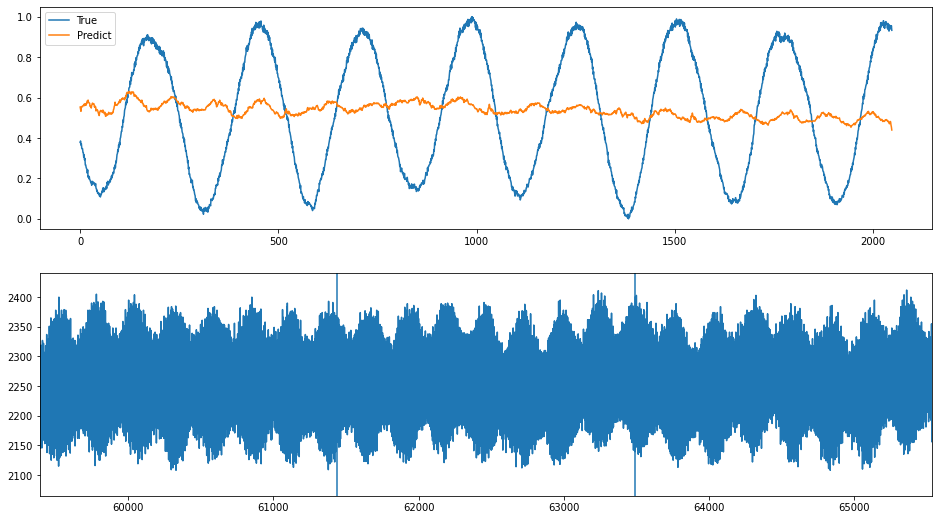

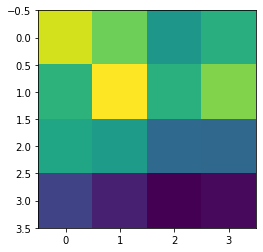

index: 364699
Error: 0.09478209467887594
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           3
Name: 824, dtype: object


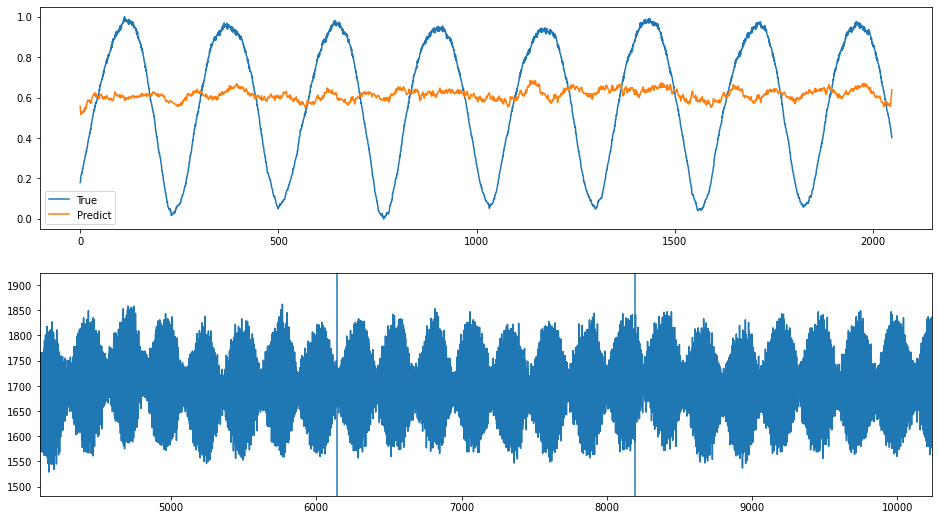

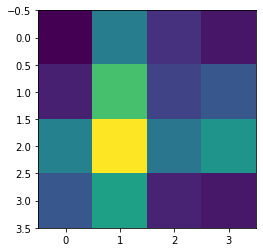

index: 359886
Error: 0.09451591895370498
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          12
Name: 3128, dtype: object


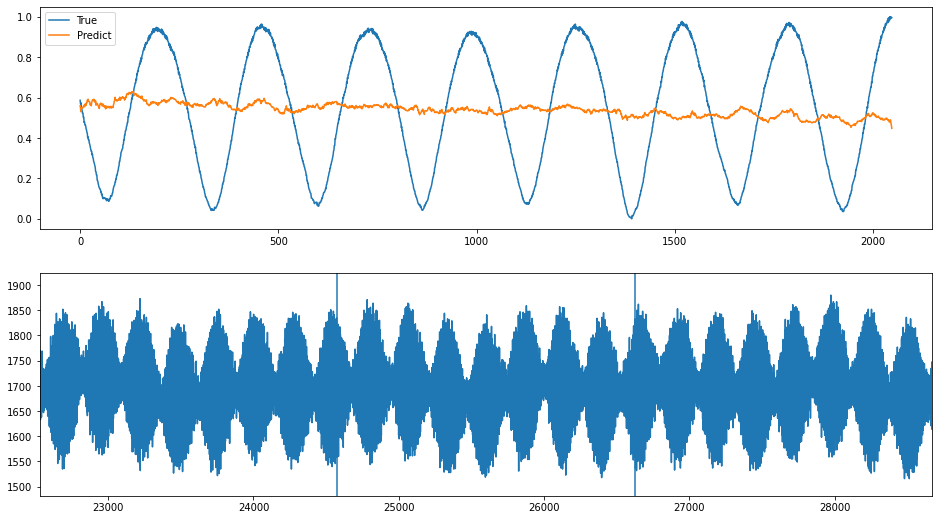

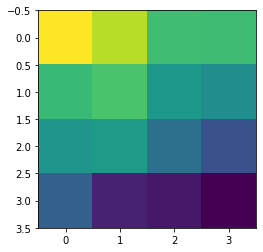

index: 362858
Error: 0.0941906119395331
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          18
Name: 4664, dtype: object


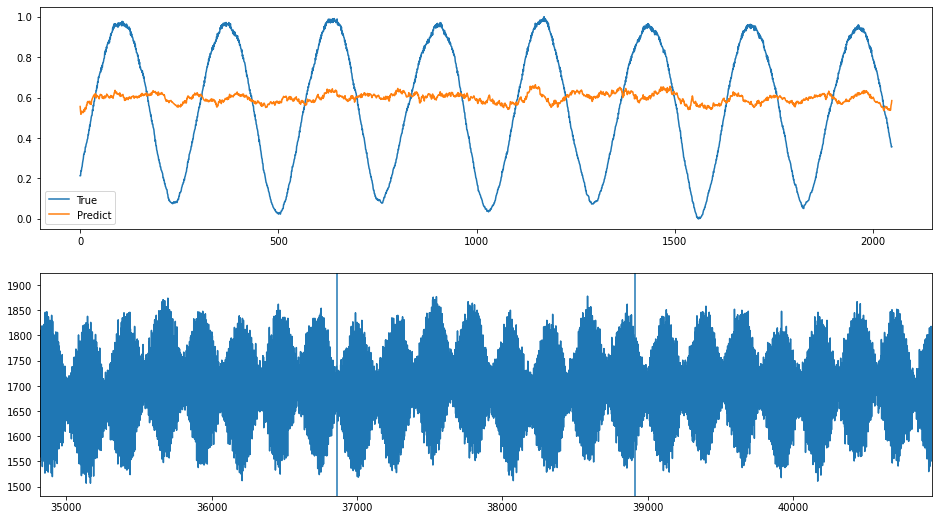

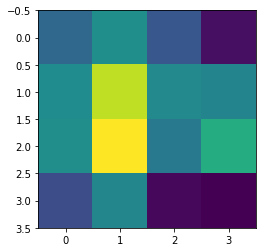

index: 362163
Error: 0.09400940625431155
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:00:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1504
bunch_number                                                   63
ts_length                                                   65536
chunk                                                           2
Name: 512, dtype: object


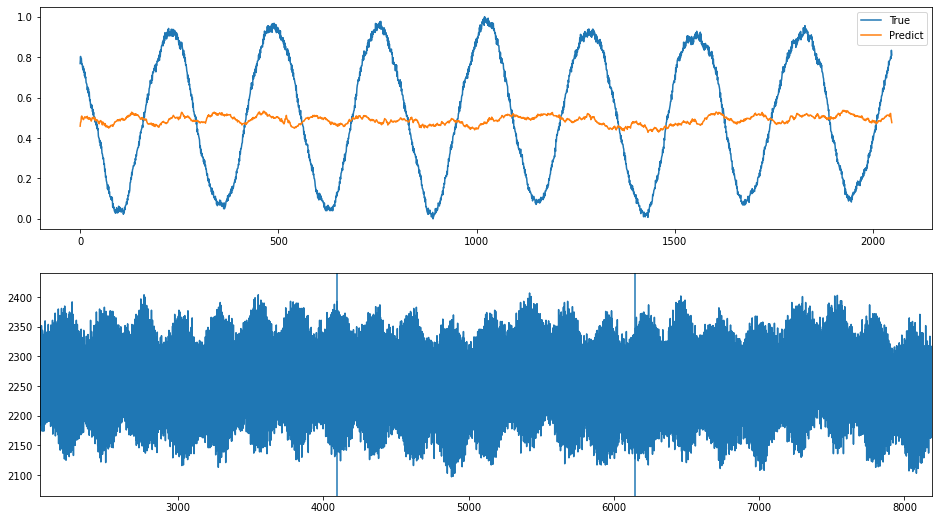

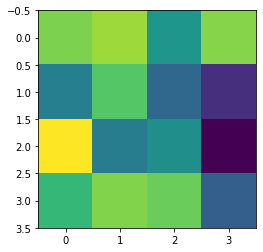

index: 363265
Error: 0.09380189306025044
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           4
Name: 1080, dtype: object


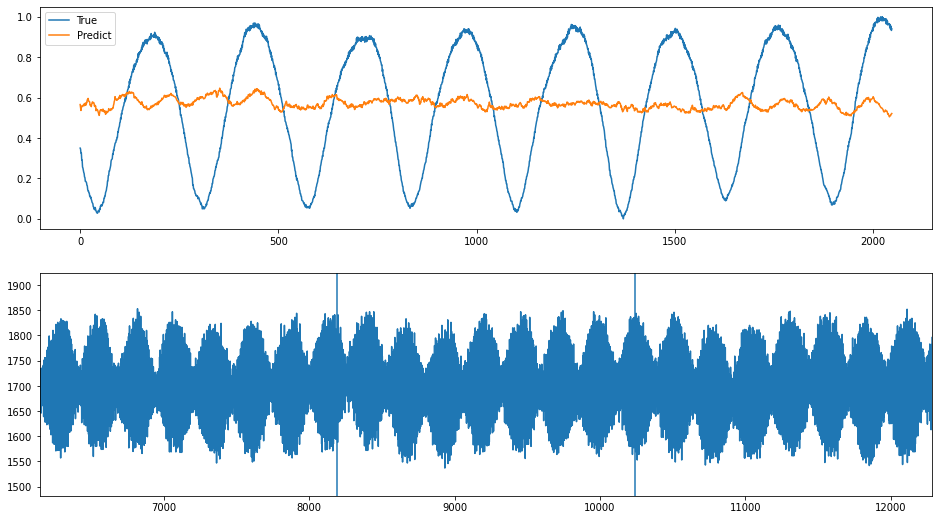

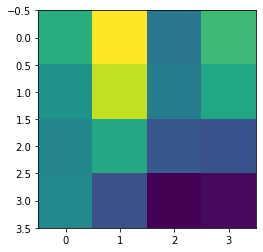

index: 360106
Error: 0.09369340637682784
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                          23
Name: 5944, dtype: object


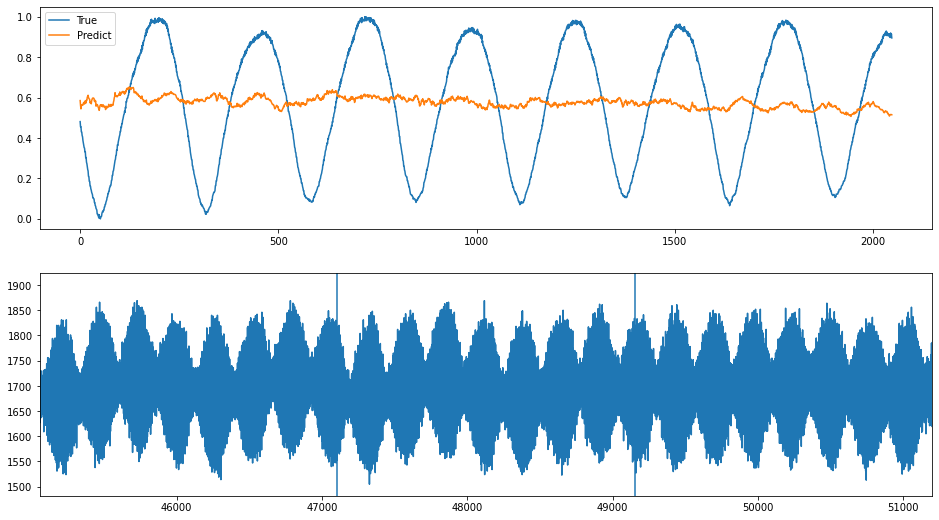

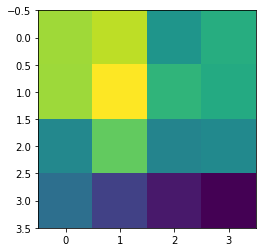

index: 357921
Error: 0.09365421933699239
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:48:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2505
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           8
Name: 2104, dtype: object


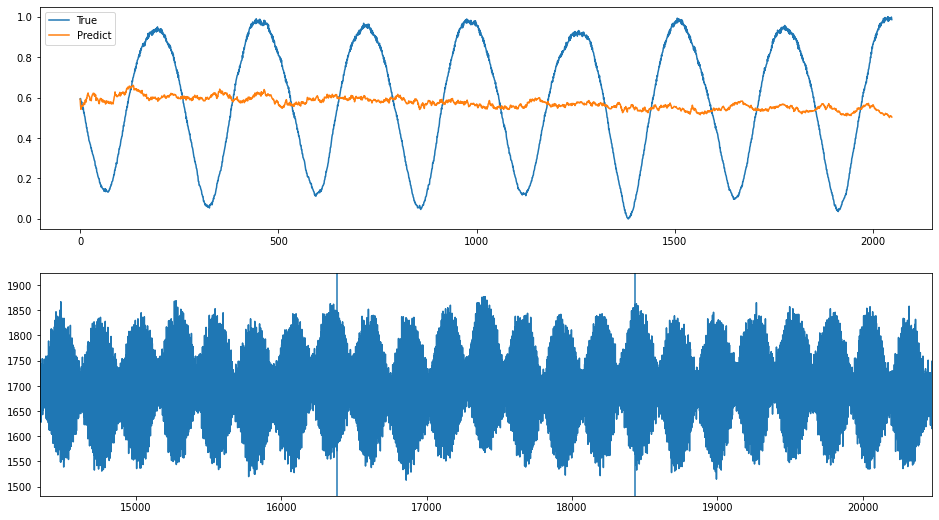

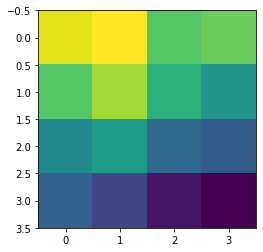

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 204672
Error: 0.02075062485789242
type                                                         Inst
fill                                                         6984
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-26 22:51:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6984/...
n_bunches                                                     286
bunch_index                                                  1309
bunch_number                                                  160
ts_length                                                   65536
chunk                                                          25
Name: 6483, dtype: object


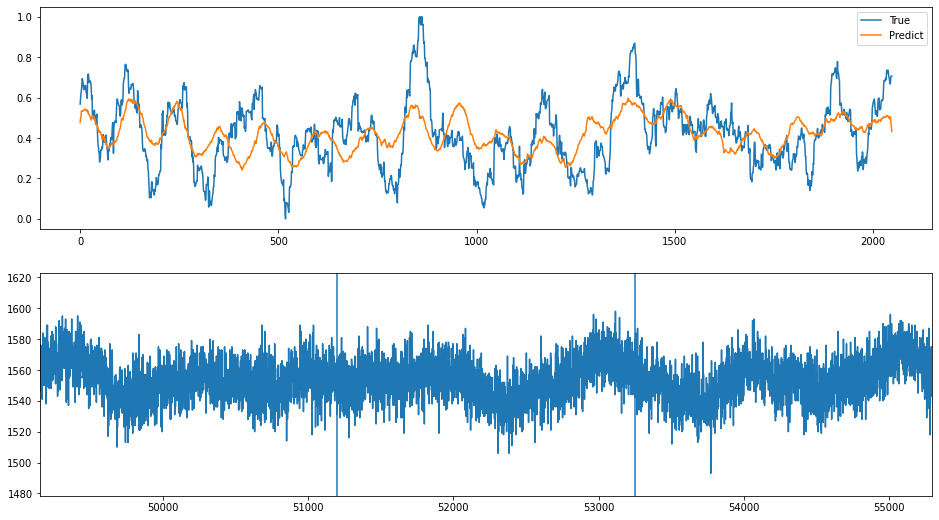

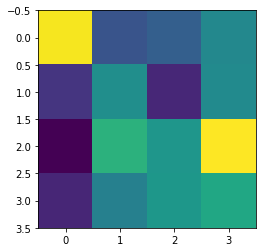

index: 18663
Error: 0.020750478730475797
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 02:22:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                    2556
bunch_index                                                  2700
bunch_number                                                 1992
ts_length                                                   65536
chunk                                                          22
Name: 5638, dtype: object


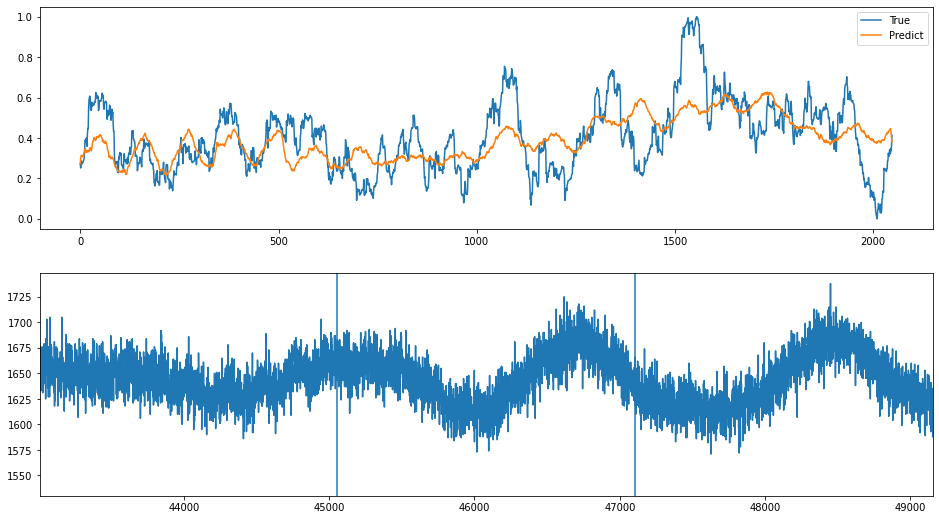

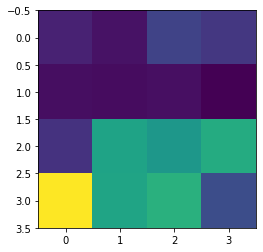

index: 79971
Error: 0.0207506646966523
type                                                         Inst
fill                                                         6984
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-26 21:30:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6984/...
n_bunches                                                     286
bunch_index                                                   444
bunch_number                                                  106
ts_length                                                   65536
chunk                                                           9
Name: 2369, dtype: object


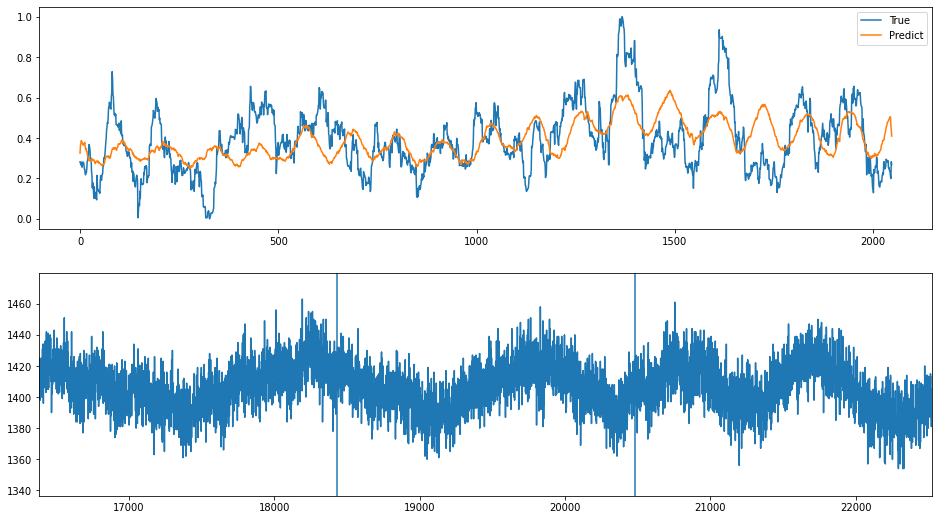

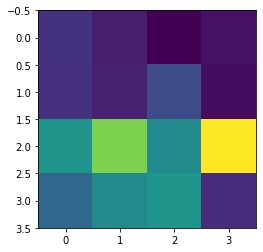

index: 138905
Error: 0.020750681215709783
type                                                         Inst
fill                                                         7446
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-16 03:12:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7446/...
n_bunches                                                     648
bunch_index                                                  1458
bunch_number                                                  273
ts_length                                                   65536
chunk                                                          25
Name: 6566, dtype: object


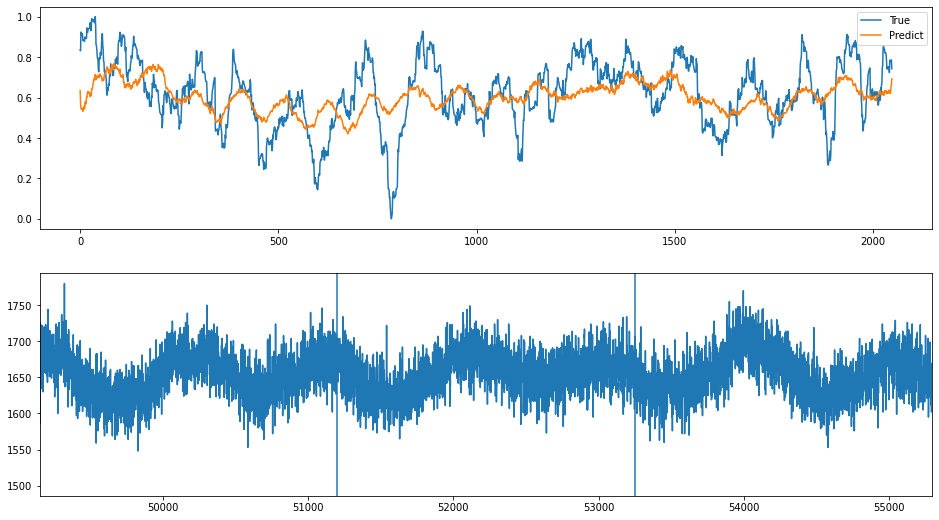

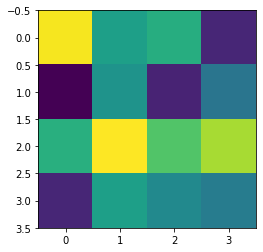

index: 192882
Error: 0.020750701115855454
type                                                         Inst
fill                                                         7052
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-13 14:21:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7052/...
n_bunches                                                    2556
bunch_index                                                   834
bunch_number                                                  601
ts_length                                                   65536
chunk                                                          18
Name: 4682, dtype: object


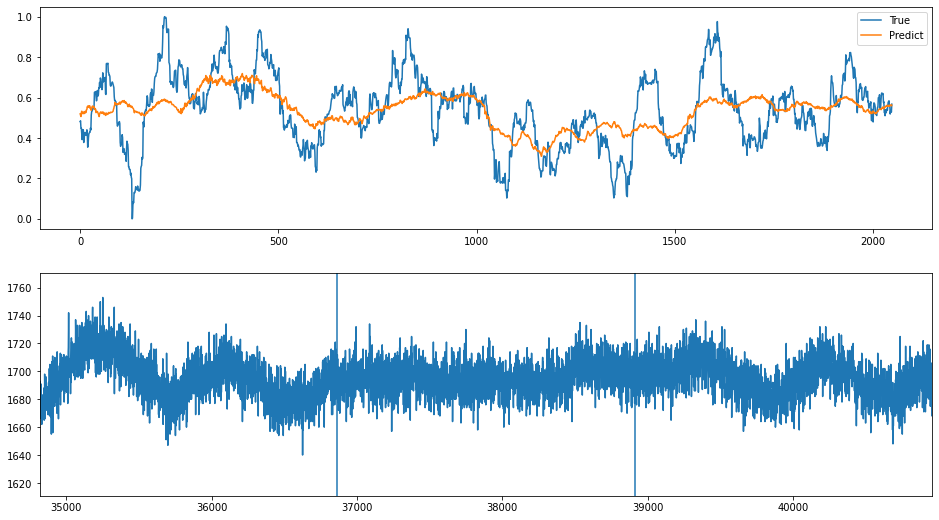

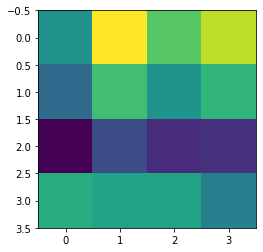

index: 391925
Error: 0.02075072512847163
type                                                         Inst
fill                                                         6243
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-26 03:37:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6243/...
n_bunches                                                    1916
bunch_index                                                  1133
bunch_number                                                  618
ts_length                                                   65536
chunk                                                          15
Name: 4009, dtype: object


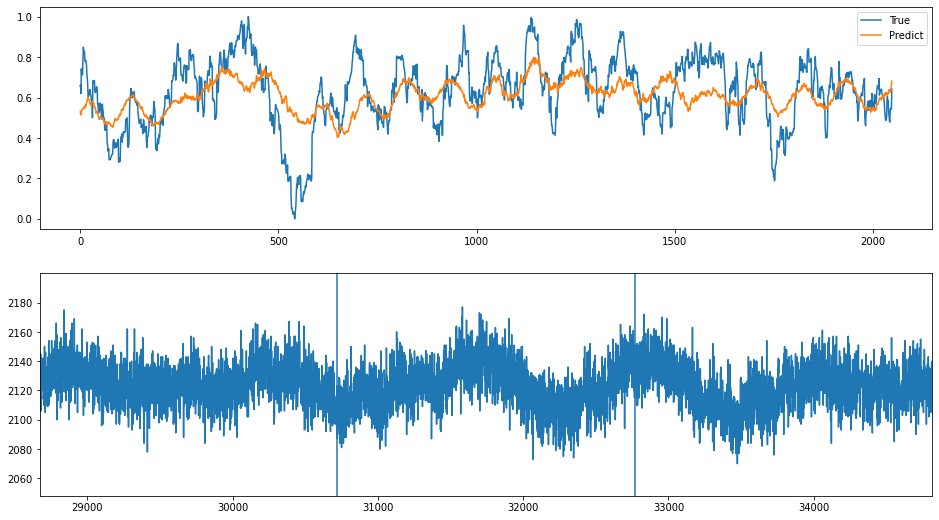

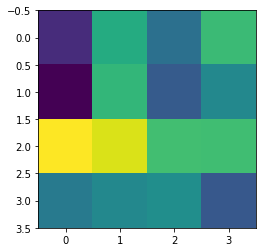

index: 15425
Error: 0.020750376501598132
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 20:05:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     733
bunch_index                                                  2698
bunch_number                                                  565
ts_length                                                   65536
chunk                                                          23
Name: 6011, dtype: object


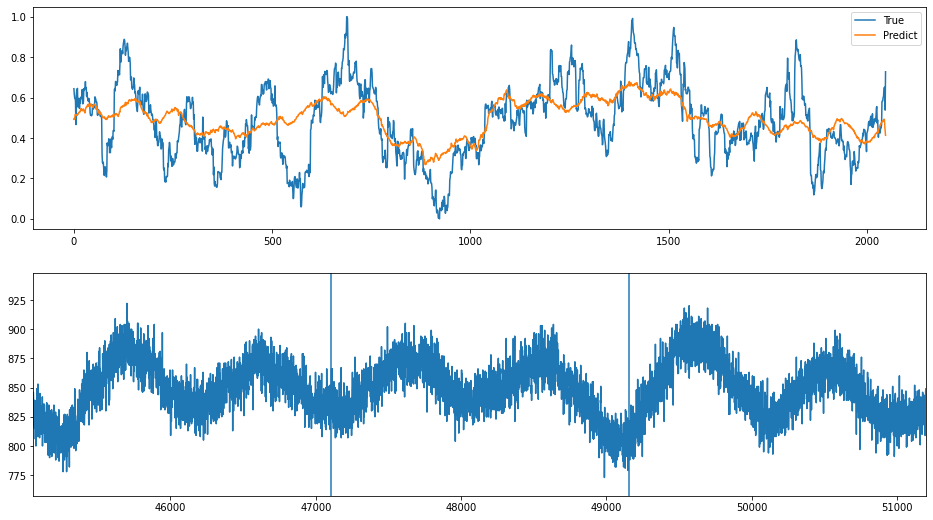

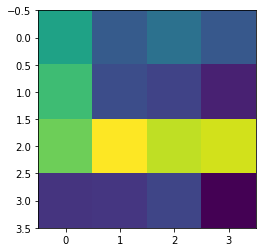

index: 373092
Error: 0.020750372223585604
type                                                         Inst
fill                                                         7488
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-12-01 08:12:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7488/...
n_bunches                                                     733
bunch_index                                                  1879
bunch_number                                                  394
ts_length                                                   65536
chunk                                                           1
Name: 499, dtype: object


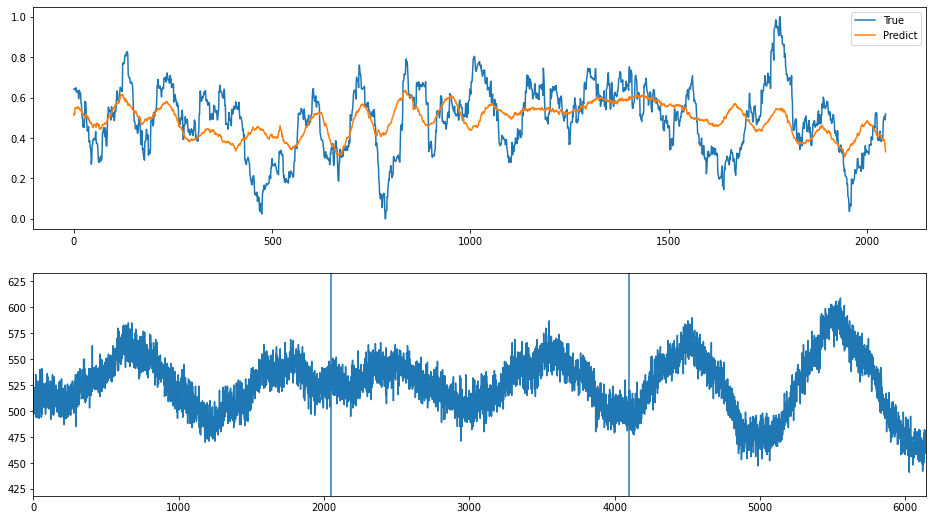

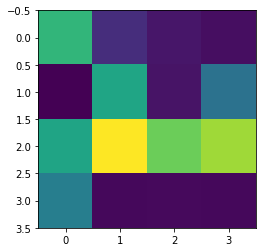

index: 17568
Error: 0.02075083177913274
type                                                         Inst
fill                                                         6594
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-22 10:17:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6594/...
n_bunches                                                     339
bunch_index                                                  2785
bunch_number                                                  284
ts_length                                                   65536
chunk                                                          22
Name: 5790, dtype: object


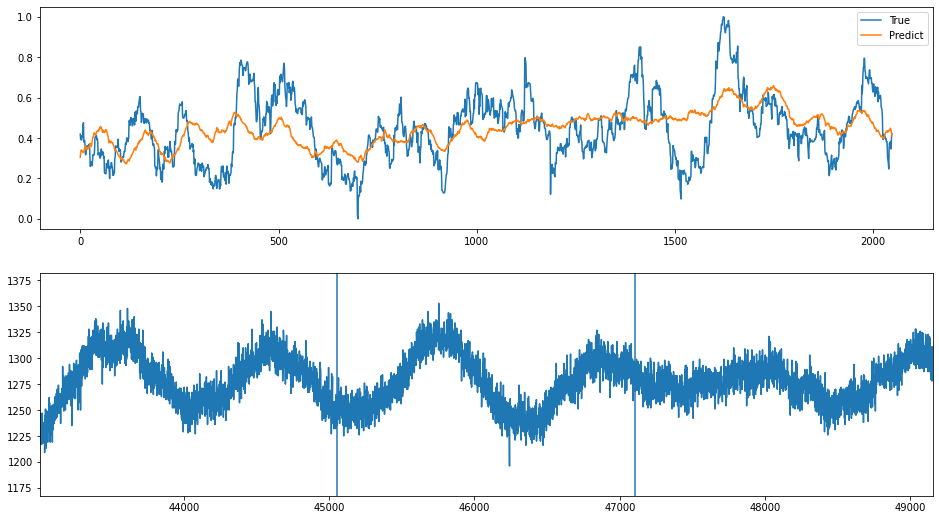

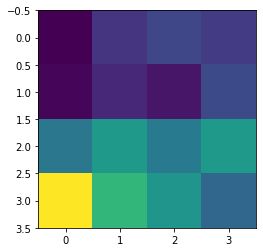

index: 367583
Error: 0.020750232333166335
type                                                         Inst
fill                                                         6706
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-20 11:22:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6706/...
n_bunches                                                     987
bunch_index                                                  1464
bunch_number                                                  475
ts_length                                                   65536
chunk                                                           2
Name: 536, dtype: object


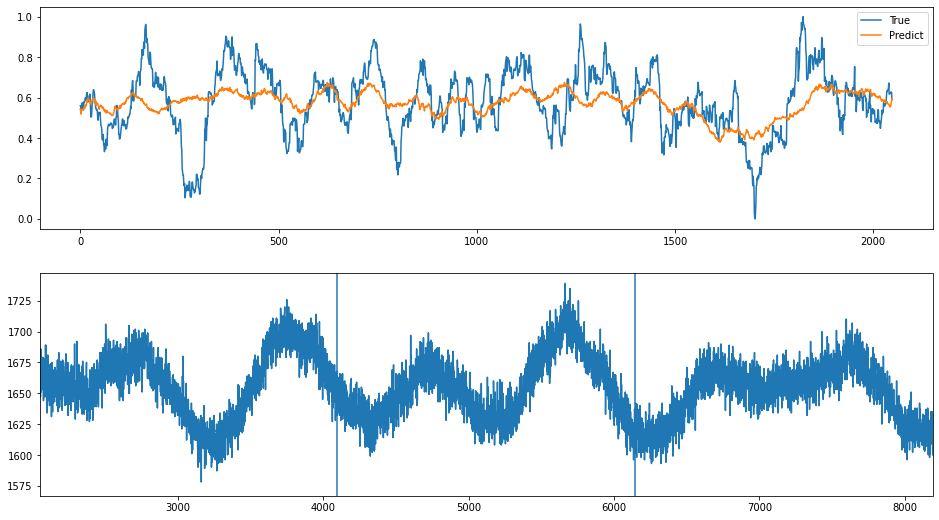

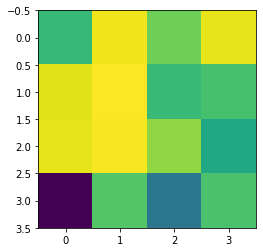

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 16)

In [34]:
print(encoded_2d[0])

[0.8843597  0.8113349  0.7949546  0.6772529  0.8560171  0.6343809
 1.0652723  0.743052   0.85017884 0.8278693  0.9616874  0.87209487
 1.0642834  1.0765569  1.162215   0.8384992 ]


In [35]:
encoded_2d.min()

0.0

In [36]:
encoded_2d.max()

7.827817

In [37]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

In [38]:
import sklearn
from sklearn.manifold import TSNE

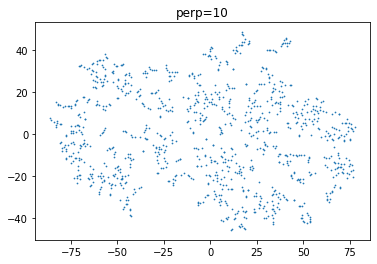

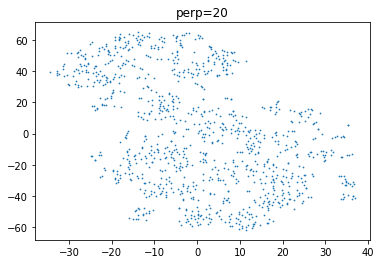

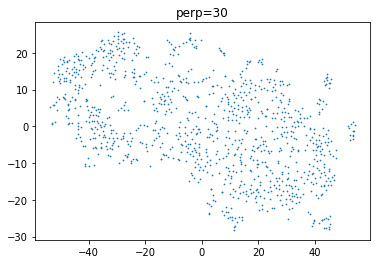

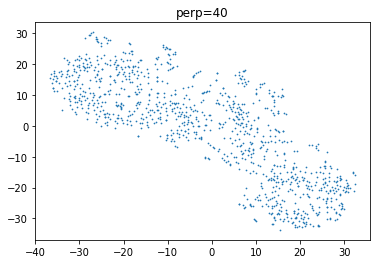

In [39]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [40]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

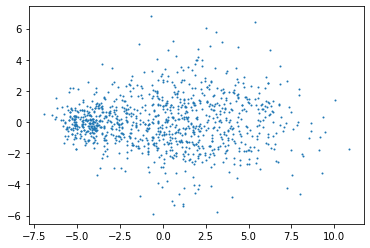

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

In [42]:
pca.explained_variance_ratio_.sum()

0.9751203

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/venv/lib64/python3.6/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/venv/lib64/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


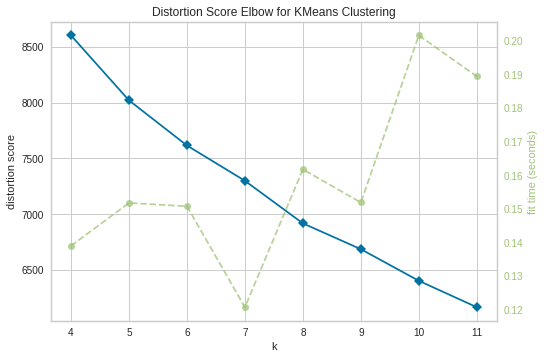

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(4, 12))
viz.fit(encoded_2d_pca)
viz.show()

In [45]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=4)
# clustering = dbscan.fit(encoded_2d_tsne)
# sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
# plt.legend(*sc.legend_elements())
# plt.show()
# for cluster in np.unique(clustering.labels_):
#     cluster_indices = np.where(clustering.labels_ == cluster)[0]
#     print("cluster", cluster)
#     fig, axes = plot_clusters(cluster_indices)
#     plt.show()
#     plot_avg_encoding(cluster_indices)
#     plt.show()